In [2]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
2+2

4

# Data Preprcessing and EDA

In [93]:
df = pd.read_csv(r'C:\Users\ninuy\Downloads\Analytics_Assessment\training.csv')
display(df)

,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail
0,1,0.41,NaN,SI1,L,,65.4,False,4.65x4.62x3.03,Very good,Other/Unknown,Princess,Good,NaN,1,430,850,6.063785,6.745236
1,2,0.42,AGSL,SI2,L,,61.7,False,4.85x4.79x2.98,Excellent,Russia,Marquise,Very good,NaN,1,560,920,6.327937,6.824374
2,3,0.40,AGSL,SI1,L,,64.0,False,4.66x4.63x2.97,Excellent,South Africa,Round,Excellent,57.0,1,560,575,6.327937,6.354370
3,4,0.41,AGSL,SI2,L,,62.7,False,4.71x4.69x2.95,Very good,Botswana,Round,Very good,58.0,1,560,825,6.327937,6.715383
4,5,0.40,AGSL,SI1,L,,63.0,False,4.71x4.68x2.96,Excellent,Botswana,Round,Very good,58.0,1,580,890,6.363028,6.791221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,8046,3.51,AGSL,VS1,D,Excellent,61.3,False,9.75x9.82x6.03,Excellent,DR Congo,Round,Excellent,56.0,2,201685,299320,12.214462,12.609269
8046,8047,3.51,NaN,SI2,H,Excellent,62.3,False,9.72x9.78x6.07,Excellent,Other/Unknown,Round,Excellent,56.0,2,53355,85110,10.884723,11.351700
8047,8048,7.62,AGSL,IF,H,Excellent,NaN,False,12.6x12.68x7.74,Excellent,South Africa,Round,Excellent,NaN,2,586790,842730,13.282422,13.644402
8048,8049,1.49,AGSL,VS1,K,Very good,NaN,False,7.22x7.34x4.53,Good,Russia,Round,Good,57.0,3,9490,14775,9.157994,9.600692


In [5]:
df.isna().sum()

id                           0
Carats                       0
Cert                       552
Clarity                      1
Color                        0
Cut                          0
Depth                     1440
Known_Conflict_Diamond       0
Measurements                 0
Polish                       0
Regions                      0
Shape                        0
Symmetry                     0
Table                     2531
Vendor                       0
Price                        0
Retail                       0
LogPrice                     0
LogRetail                    0
dtype: int64

In [94]:
offers = pd.read_csv(r'C:\Users\ninuy\Downloads\Analytics_Assessment\offers.csv')
    

In [7]:
offers.isna().sum()


id                           0
Carats                       0
Cert                       213
Clarity                      0
Color                        0
Cut                          0
Depth                      497
Known_Conflict_Diamond    2378
Measurements                 0
Polish                       0
Regions                      0
Shape                        0
Symmetry                     0
Table                      856
Vendor                       0
Offers                    2683
dtype: int64

Initial observations, Some missing data. For certifications, can label missing data as unknown organization. Something that stands out is that in the data, the variable that contains information concerning the conflict status has a lot of missing data in the offers file, but none in the training data. May drop variable depending on influence on price.

In [95]:
#Drop the singular training entry with a missing clarity value, wont be pertinent
df = df.dropna(subset=["Clarity"])

In [96]:
#Rename missing cert values as Unknown
df["Cert"] = df["Cert"].fillna("Unknown")
offers["Cert"] = offers["Cert"].fillna("Unknown")

Still have table and depth missing values, will address later. Still have to address conflict diamond value issue.

In [97]:
df = df.drop(columns=["id"])
    

             Carats     Depth     Table    Vendor     Price    Retail  \
Carats     1.000000 -0.079696  0.034383  0.300735  0.741275  0.716301   
Depth     -0.079696  1.000000  0.225223 -0.025759 -0.053685 -0.053040   
Table      0.034383  0.225223  1.000000  0.021728  0.013200  0.012138   
Vendor     0.300735 -0.025759  0.021728  1.000000  0.107516  0.092289   
Price      0.741275 -0.053685  0.013200  0.107516  1.000000  0.955600   
Retail     0.716301 -0.053040  0.012138  0.092289  0.955600  1.000000   
LogPrice   0.838804 -0.062959  0.028262  0.539647  0.593733  0.576830   
LogRetail  0.781489 -0.065291  0.025289  0.478503  0.554384  0.573376   

           LogPrice  LogRetail  
Carats     0.838804   0.781489  
Depth     -0.062959  -0.065291  
Table      0.028262   0.025289  
Vendor     0.539647   0.478503  
Price      0.593733   0.554384  
Retail     0.576830   0.573376  
LogPrice   1.000000   0.928774  
LogRetail  0.928774   1.000000  


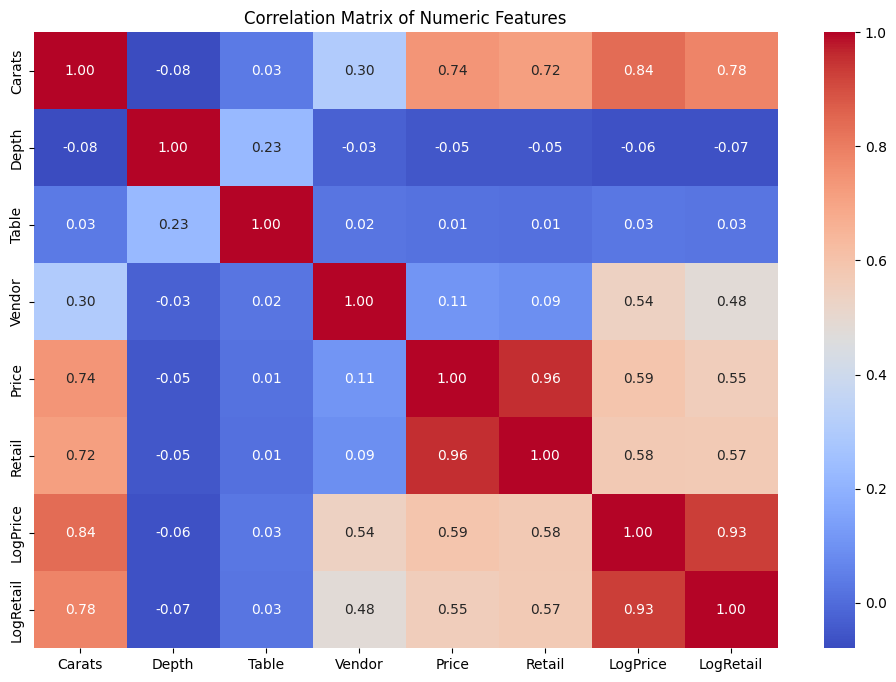

In [98]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Display the matrix
print(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [99]:
print(df["Polish"].unique())
print(offers["Polish"].unique())
print(df["Symmetry"].unique())
print(offers["Symmetry"].unique())
print(df["Cut"].unique())
print(offers["Cut"].unique())

['Very good' 'Excellent' 'Good' ' ']
['Excellent' 'Very good' 'Good' ' ' 'Fair']
['Good' 'Very good' 'Excellent' ' ' 'Faint' 'Fair' 'Execllent']
['Excellent' 'Very good' 'Good' ' ' 'Faint' 'Fair']
[' ' 'Excellent' 'Very good' 'Good' 'Fair' 'Ideal']
[' ' 'Very good' 'Excellent' 'Good' 'Fair' 'Ideal']


In [100]:
#Polish Distribution
print("Training Polish distribution:")
print(df["Polish"].value_counts(dropna=False))

print("\nOffers Polish distribution:")
print(offers["Polish"].value_counts(dropna=False))

# Symmetry distribution
print("\nTraining Symmetry distribution:")
print(df["Symmetry"].value_counts(dropna=False))

print("\nOffers Symmetry distribution:")
print(offers["Symmetry"].value_counts(dropna=False))

# Cut distribution
print("\nTraining Cut distribution:")
print(df["Cut"].value_counts(dropna=False))

print("\nOffers Cut distribution:")
print(offers["Cut"].value_counts(dropna=False))

Training Polish distribution:
Polish
Excellent    5383
Very good    1589
              899
Good          178
Name: count, dtype: int64

Offers Polish distribution:
Polish
Excellent    1781
Very good     539
              291
Good           70
Fair            2
Name: count, dtype: int64

Training Symmetry distribution:
Symmetry
Excellent    4759
Very good    1980
              899
Good          391
Fair           16
Faint           3
Execllent       1
Name: count, dtype: int64

Offers Symmetry distribution:
Symmetry
Excellent    1542
Very good     677
              291
Good          166
Fair            6
Faint           1
Name: count, dtype: int64

Training Cut distribution:
Cut
             3922
Excellent    2810
Very good    1123
Good          178
Fair           15
Ideal           1
Name: count, dtype: int64

Offers Cut distribution:
Cut
             1253
Excellent     953
Very good     391
Good           81
Fair            4
Ideal           1
Name: count, dtype: int64


Penalize missing data, we're on a budget and trying to maximize prophet, diamonds with missing data increase the risk we take on. 

In [101]:
scale = {" ": 0, "Faint": 0, "Fair": 1, "Good": 2, "Very good": 3, "Excellent": 4, "Execllent": 4, "Ideal" : 5}

df["Polish"] = df["Polish"].map(scale)
df["Symmetry"] = df["Symmetry"].map(scale)
df["Cut"] = df["Cut"].map(scale)


offers["Polish"] = offers["Polish"].map(scale)
offers["Symmetry"] = offers["Symmetry"].map(scale)
offers["Cut"] = offers["Cut"].map(scale)

In [102]:
#Check the rest of the entries for missing data
print(df["Cert"].unique())
print(offers["Cert"].unique())

['Unknown' 'AGSL' 'GemEx']
['AGSL' 'GemEx' 'Unknown']


In [103]:
print(df["Clarity"].unique())
print(offers["Clarity"].unique())

['SI1' 'SI2' 'VS2' 'VVS1' 'VS1' 'VVS2' 'I1' 'IF' 'FL' 'I2' 'N' 'I3']
['SI2' 'VS2' 'SI1' 'VS1' 'VVS2' 'VVS1' 'IF' 'I1' 'I2' 'I3']


In [104]:
print(df["Shape"].unique())
print(offers["Shape"].unique())

['Princess' 'Marquise' 'Round' 'Oval' 'Radiant' 'Emerald' 'Pear' 'Asscher'
 'Cushion' 'ROUND' 'Uncut' 'Oval ' 'Marquis']
['Round' 'Emerald' 'Oval' 'Radiant' 'Asscher' 'Pear' 'Marquise' 'Princess'
 'ROUND' 'Oval ' 'Cushion' 'Marquis' 'Uncut']


In [105]:
# Strip spaces and convert to lowercase
df['Shape'] = df['Shape'].str.strip().str.lower()
offers['Shape'] = offers['Shape'].str.strip().str.lower()

#Fix Spelling
df['Shape'] = df['Shape'].replace({'marquis': 'marquise'})
offers['Shape'] = offers['Shape'].replace({'marquis': 'marquise'})




In [106]:
print(df["Color"].unique())
print(offers["Color"].unique())

['L' 'M' 'K' 'J' 'F' 'I' 'H' 'G' 'E' 'D' 'N' 'Ffcly' 'Ffcdbrown'
 'Fvyellow' 'Fdy' 'Fyellow' 'U' 'Flyellow' 'Ffg' 'Q-r' 'S' 'Lb' 'Fiyellow'
 'Gy' 'Fdpink' 'Ffcy' 'P' 'Fiy' 'Ffcg' 'W' 'O-p']
['L' 'M' 'K' 'J' 'H' 'G' 'I' 'E' 'F' 'D' 'S-t' 'T' 'N' 'Ffancy darkbrown'
 'Flby']


In [107]:
def consolidate_color(s):
    if pd.isna(s):
        return np.nan

   

    if s in ["Ffcly", "Ffcdbrown", "Fvyellow", "Fdy", "Fyellow", "Flyellow", "Ffg", "Lb", "Fiyellow", "Gy", "Fdpink",
            "Ffcy", "Fiy", "Ffcg", "Ffancy darkbrown", "Flby"]:
        return "Fancy"
    elif s in ["N", "O", "P", "Q", "R", "Q-r", "O-p"]:
        return "Very Light"
    elif s in ["S", "T", "U", "V", "W", "X", "Y", "Z", "S-t"]:
        return "Light"
    else:
        return s  


df['Color_Consolidated'] = df['Color'].apply(consolidate_color)

print(df['Color'].unique())
print(df['Color_Consolidated'].value_counts(dropna=False))


['L' 'M' 'K' 'J' 'F' 'I' 'H' 'G' 'E' 'D' 'N' 'Ffcly' 'Ffcdbrown'
 'Fvyellow' 'Fdy' 'Fyellow' 'U' 'Flyellow' 'Ffg' 'Q-r' 'S' 'Lb' 'Fiyellow'
 'Gy' 'Fdpink' 'Ffcy' 'P' 'Fiy' 'Ffcg' 'W' 'O-p']
Color_Consolidated
G             1188
I             1158
H             1092
E             1042
F             1000
J              843
D              816
K              540
L              259
M               85
Fancy           18
Very Light       5
Light            3
Name: count, dtype: int64


In [108]:
offers['Color_Consolidated'] = offers['Color'].apply(consolidate_color)

print(offers['Color'].unique())
print(offers['Color_Consolidated'].value_counts(dropna=False))

['L' 'M' 'K' 'J' 'H' 'G' 'I' 'E' 'F' 'D' 'S-t' 'T' 'N' 'Ffancy darkbrown'
 'Flby']
Color_Consolidated
G             387
I             360
F             359
E             356
H             353
J             303
D             256
K             182
L              92
M              29
Light           2
Very Light      2
Fancy           2
Name: count, dtype: int64


In [109]:
print(df["Known_Conflict_Diamond"].unique())
print(offers["Known_Conflict_Diamond"].unique())

[False  True]
[nan True False]


In [110]:
df['Known_Conflict_Diamond'] = df['Known_Conflict_Diamond'].map({True: 1, False: 0})

offers['Known_Conflict_Diamond'] = offers['Known_Conflict_Diamond'].map({True: 1, False: 0})



               total_conflict  total_offers  pct_conflict
Regions                                                  
Angola                    120           586     20.477816
Australia                   0           886      0.000000
Botswana                    0          1438      0.000000
Canada                      0           745      0.000000
DR Congo                  159           796     19.974874
Other/Unknown               0           303      0.000000
Russia                      0          2599      0.000000
South Africa                0           556      0.000000
Zimbabwe                   30           140     21.428571


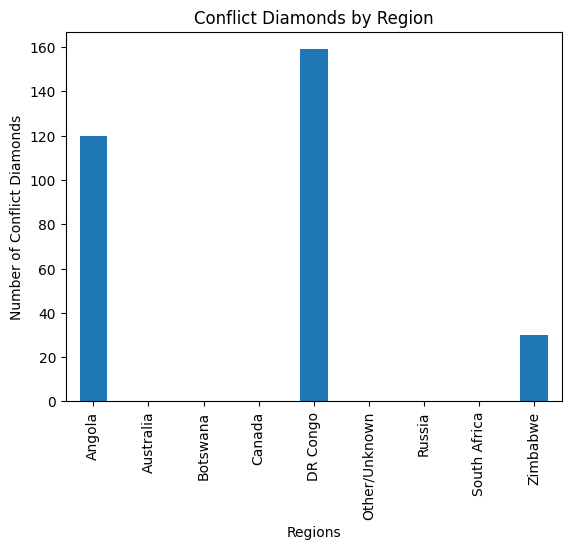

In [111]:
# Count of conflict diamonds per region
conflict_counts = df.groupby('Regions')['Known_Conflict_Diamond'].sum()

# total and percentage:
conflict_summary = df.groupby('Regions')['Known_Conflict_Diamond'].agg(
    total_conflict='sum',        # number of conflict diamonds
    total_offers='count'         # total diamonds in that region
)
conflict_summary['pct_conflict'] = (
    conflict_summary['total_conflict'] / conflict_summary['total_offers'] * 100
)

print(conflict_summary)

conflict_summary['total_conflict'].plot(kind='bar')
plt.ylabel("Number of Conflict Diamonds")
plt.title("Conflict Diamonds by Region")
plt.show()

Here we can see that conflict diamonds only appear out of Angola, DR Congo, and Zimbabwe. Any diamonds listed in the offer section not from those 3 countries can be listed as non conflict diamonds.

In [112]:
# Define regions where conflict diamonds are possible
conflict_regions = ["Angola", "DR Congo", "Zimbabwe"]

# Create/update Known_Conflict_Status
# If missing AND region not in conflict_regions → set to 0
offers['Known_Conflict_Diamond'] = offers.apply(
    lambda row: 0 if pd.isna(row['Known_Conflict_Diamond']) and row['Regions'] not in conflict_regions 
    else row['Known_Conflict_Diamond'], 
    axis=1
)

offers['Known_Conflict_Diamond'] = offers['Known_Conflict_Diamond'].astype(float)


In [113]:
len(offers[offers['Regions'] == 'Other/Unknown'])

91

In [114]:
print(df["Regions"].unique())
print(offers["Regions"].unique())

['Other/Unknown' 'Russia' 'South Africa' 'Botswana' 'Canada' 'DR Congo'
 'Zimbabwe' 'Angola' 'Australia']
['Australia' 'DR Congo' 'Angola' 'Russia' 'Botswana' 'Zimbabwe' 'Canada'
 'Other/Unknown' 'South Africa']


In [115]:
print(df["Vendor"].unique())

[1 2 3 4]


                          Carats       Cut     Depth  Known_Conflict_Diamond  \
Carats                  1.000000  0.185818 -0.079696                0.005324   
Cut                     0.185818  1.000000 -0.045224                0.002336   
Depth                  -0.079696 -0.045224  1.000000                0.016928   
Known_Conflict_Diamond  0.005324  0.002336  0.016928                1.000000   
Polish                  0.111625  0.372521  0.010784                0.006504   
Symmetry                0.134393  0.390923  0.000919                0.012407   
Table                   0.034383  0.025535  0.225223               -0.003005   
Vendor                  0.300735  0.211681 -0.025759                0.001612   
Price                   0.741275  0.110308 -0.053685                0.007801   
Retail                  0.716301  0.107045 -0.053040               -0.074190   
LogPrice                0.838804  0.323942 -0.062959                0.010216   
LogRetail               0.781489  0.2963

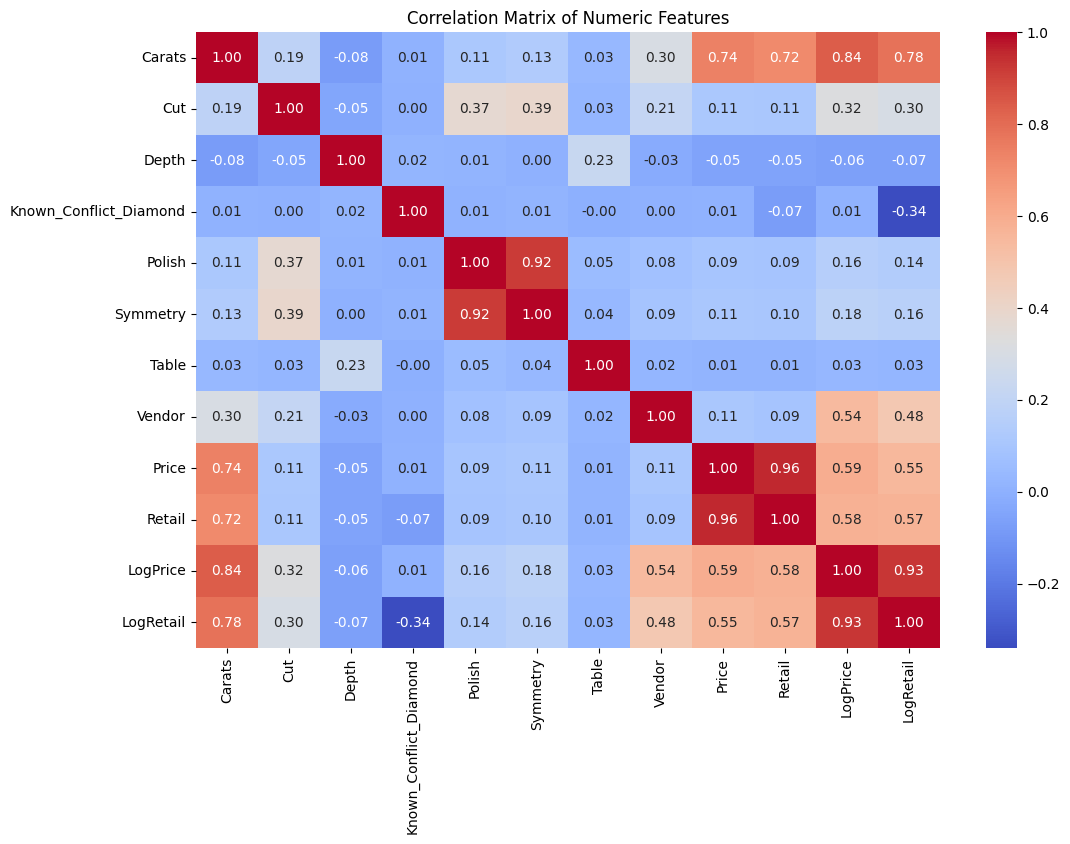

In [116]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float', 'int']).columns
corr_matrix = df[numeric_cols].corr()

# Display the matrix
print(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

It is imortant to note that known conflict diamonds seem to show some negative correlation with retail

                    Price    Retail  LogPrice  LogRetail
Color_D          0.067773  0.075250  0.073260   0.073617
Color_E          0.002641 -0.000074 -0.037380  -0.031256
Color_F          0.003231  0.008094 -0.025479  -0.016453
Color_Fdpink    -0.001763 -0.001296  0.003183   0.004534
Color_Fdy       -0.006138 -0.005853 -0.022217  -0.016756
Color_Ffcdbrown -0.005770 -0.005468 -0.017356  -0.013744
Color_Ffcg       0.019494  0.013391  0.022312   0.019144
Color_Ffcly     -0.004238 -0.004081 -0.013369  -0.010804
Color_Ffcy      -0.001230 -0.000792  0.004692   0.005750
Color_Ffg       -0.005757 -0.005444 -0.015075  -0.011383
Color_Fiy       -0.003649 -0.003907 -0.006068  -0.008502
Color_Fiyellow   0.002483  0.001522  0.011284   0.009827
Color_Flyellow  -0.003868 -0.003835 -0.008154  -0.007711
Color_Fvyellow   0.008653 -0.003042  0.015803   0.002597
Color_Fyellow   -0.003453 -0.003169 -0.004540  -0.002548
Color_G         -0.004406 -0.013182  0.008090   0.004648
Color_Gy        -0.003151 -0.00

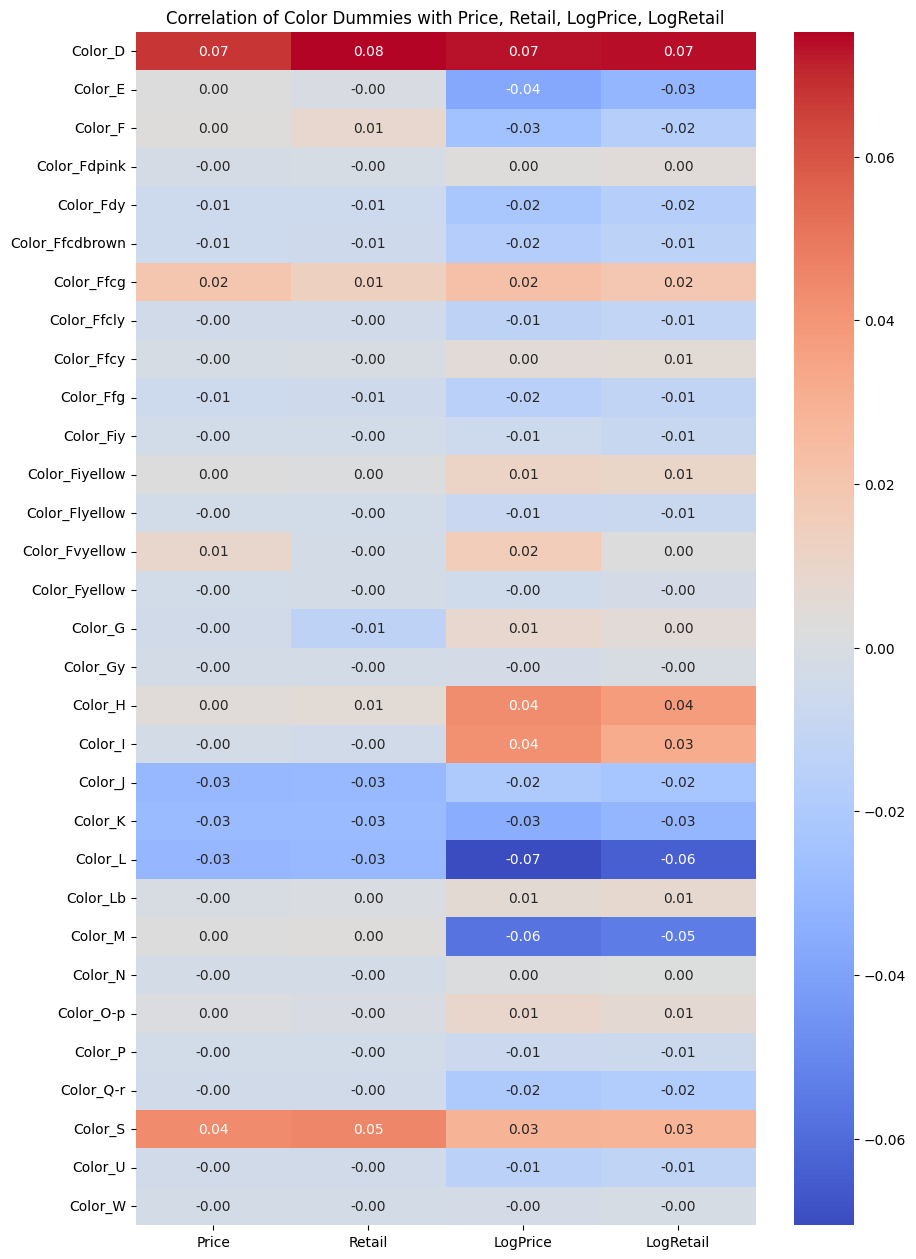

In [117]:
color_dummies = pd.get_dummies(df["Color"], prefix="Color", dummy_na=False)

# Combine dummies with numeric/log columns
numeric_cols = ["Price", "Retail", "LogPrice", "LogRetail"]
df_corr = pd.concat([color_dummies, df[numeric_cols]], axis=1)

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Keep only correlations of color dummies with the numeric/log columns
color_corr = corr_matrix.loc[color_dummies.columns, numeric_cols]
print(color_corr)

#heatmap for visualization
plt.figure(figsize=(10, len(color_dummies.columns)*0.5))
sns.heatmap(color_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation of Color Dummies with Price, Retail, LogPrice, LogRetail")
plt.show()

In [118]:
df['Is_D_Color'] = (df['Color'] == 'D').astype(int)
df['Is_Fancy_Color'] = (df['Color'] == 'Fancy').astype(int)

                 Price    Retail  LogPrice  LogRetail
Clarity_FL    0.121932  0.130445  0.047241   0.046455
Clarity_I1   -0.038945 -0.037512 -0.091060  -0.078736
Clarity_I2   -0.013157 -0.012873 -0.035388  -0.030581
Clarity_I3   -0.003405 -0.003315 -0.004197  -0.003448
Clarity_IF    0.167432  0.159589  0.120047   0.117148
Clarity_N    -0.006138 -0.005853 -0.022217  -0.016756
Clarity_SI1  -0.049403 -0.050007 -0.021205  -0.021265
Clarity_SI2  -0.081388 -0.081917 -0.088977  -0.084107
Clarity_VS1   0.044867  0.046914  0.080393   0.074841
Clarity_VS2   0.026180  0.025395  0.021907   0.017931
Clarity_VVS1  0.012306  0.010833  0.002230   0.000968
Clarity_VVS2  0.053273  0.057787  0.040266   0.040731


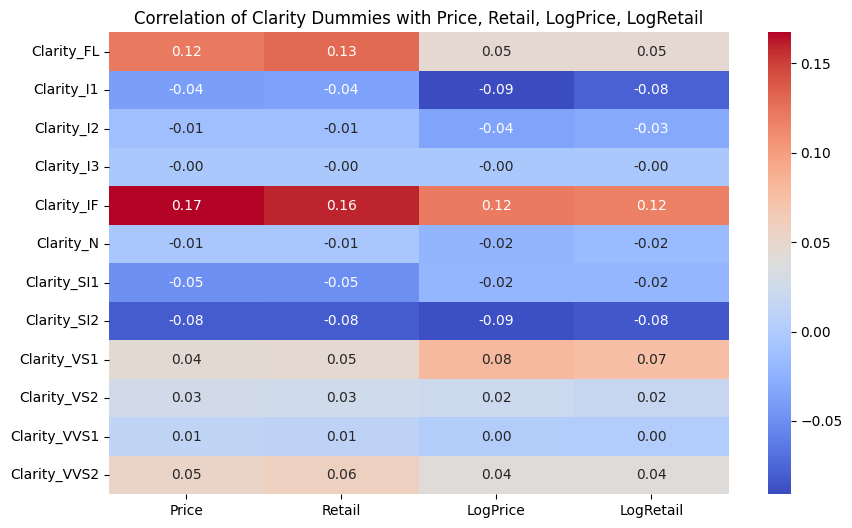

In [119]:
color_dummies = pd.get_dummies(df["Clarity"], prefix="Clarity", dummy_na=False)

# Combine dummies with numeric/log columns
numeric_cols = ["Price", "Retail", "LogPrice", "LogRetail"]
df_corr = pd.concat([color_dummies, df[numeric_cols]], axis=1)

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Keep only correlations of color dummies with the numeric/log columns
color_corr = corr_matrix.loc[color_dummies.columns, numeric_cols]
print(color_corr)

#heatmap for visualization
plt.figure(figsize=(10, len(color_dummies.columns)*0.5))
sns.heatmap(color_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation of Clarity Dummies with Price, Retail, LogPrice, LogRetail")
plt.show()

                          Price    Retail  LogPrice  LogRetail
Regions_Angola         0.000110 -0.012713  0.007667  -0.073738
Regions_Australia     -0.016650 -0.007860 -0.015259   0.018808
Regions_Botswana      -0.002563 -0.002584 -0.018159   0.000118
Regions_Canada         0.010980  0.022630  0.002278   0.030574
Regions_DR Congo       0.010055 -0.023228  0.009900  -0.097426
Regions_Other/Unknown  0.008667  0.015287  0.016094   0.031256
Regions_Russia         0.002587  0.019219  0.013855   0.073000
Regions_South Africa  -0.005827 -0.007495 -0.010899   0.001079
Regions_Zimbabwe      -0.010720 -0.021933 -0.004999  -0.052836


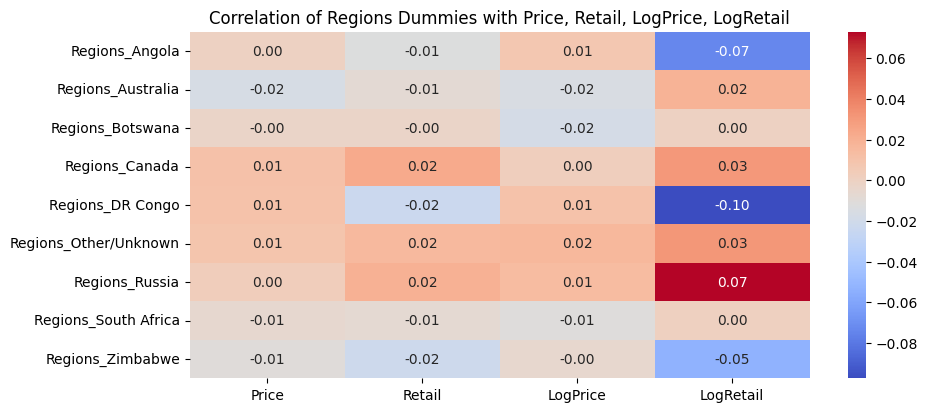

In [120]:
color_dummies = pd.get_dummies(df["Regions"], prefix="Regions", dummy_na=False)

# Combine dummies with numeric/log columns
numeric_cols = ["Price", "Retail", "LogPrice", "LogRetail"]
df_corr = pd.concat([color_dummies, df[numeric_cols]], axis=1)

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Keep only correlations of color dummies with the numeric/log columns
color_corr = corr_matrix.loc[color_dummies.columns, numeric_cols]
print(color_corr)

#heatmap for visualization
plt.figure(figsize=(10, len(color_dummies.columns)*0.5))
sns.heatmap(color_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation of Regions Dummies with Price, Retail, LogPrice, LogRetail")
plt.show()

             Price    Retail  LogPrice  LogRetail
Vendor_1 -0.253655 -0.247141 -0.733753  -0.680977
Vendor_2  0.277384  0.281259  0.482284   0.467513
Vendor_3 -0.053759 -0.048084  0.103256   0.102894
Vendor_4  0.006808 -0.014189  0.225576   0.172380


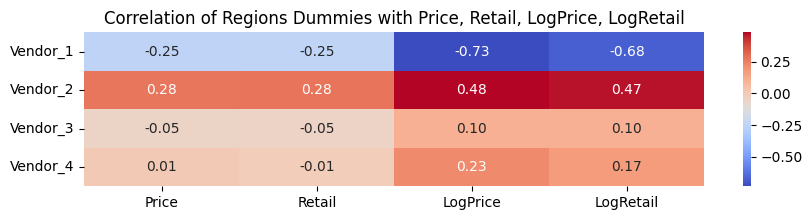

In [121]:
color_dummies = pd.get_dummies(df["Vendor"], prefix="Vendor", dummy_na=False)

# Combine dummies with numeric/log columns
numeric_cols = ["Price", "Retail", "LogPrice", "LogRetail"]
df_corr = pd.concat([color_dummies, df[numeric_cols]], axis=1)

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Keep only correlations of color dummies with the numeric/log columns
color_corr = corr_matrix.loc[color_dummies.columns, numeric_cols]
print(color_corr)

#heatmap for visualization
plt.figure(figsize=(10, len(color_dummies.columns)*0.5))
sns.heatmap(color_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation of Regions Dummies with Price, Retail, LogPrice, LogRetail")
plt.show()

In [122]:
df['Vendor_1'] = (df['Vendor'] == 1).astype(int)
df['Vendor_3'] = (df['Vendor'] == 3).astype(int)
df['Vendor_4'] = (df['Vendor'] == 4).astype(int)


A lot of categorical varibales appear to have low impact on Price and retail. Something interesting to note is that diamonds from certain regions have a disproportionate effect on LogRetail vs LogPrice 

In [123]:
# Replace * with x so everything uses the same delimiter
df["Measurements"] = df["Measurements"].str.replace("*", "x", regex=False)
offers["Measurements"] = offers["Measurements"].str.replace("*", "x", regex=False)

# split into numeric columns
df[["Length", "Width", "Depth_mm"]] = df["Measurements"].str.split("x", expand=True).astype(float)
offers[["Length", "Width", "Depth_mm"]] = offers["Measurements"].str.split("x", expand=True).astype(float)

# engineered features
df["LWRatio"] = df["Length"] / df["Width"]
offers["LWRatio"] = offers["Length"] / offers["Width"]

df["Volume"] = df["Length"] * df["Width"] * df["Depth_mm"]
offers["Volume"] = offers["Length"] * offers["Width"] * offers["Depth_mm"]


In [39]:
df

,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,...,Is_D_Color,Is_Fancy_Color,Vendor_1,Vendor_3,Vendor_4,Length,Width,Depth_mm,LWRatio,Volume
0,0.41,Unknown,SI1,L,0,65.4,0,4.65x4.62x3.03,3,Other/Unknown,...,0,0,1,0,0,4.65,4.62,3.03,1.006494,65.093490
1,0.42,AGSL,SI2,L,0,61.7,0,4.85x4.79x2.98,4,Russia,...,0,0,1,0,0,4.85,4.79,2.98,1.012526,69.229870
2,0.40,AGSL,SI1,L,0,64.0,0,4.66x4.63x2.97,4,South Africa,...,0,0,1,0,0,4.66,4.63,2.97,1.006479,64.080126
3,0.41,AGSL,SI2,L,0,62.7,0,4.71x4.69x2.95,3,Botswana,...,0,0,1,0,0,4.71,4.69,2.95,1.004264,65.165205
4,0.40,AGSL,SI1,L,0,63.0,0,4.71x4.68x2.96,4,Botswana,...,0,0,1,0,0,4.71,4.68,2.96,1.006410,65.246688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,3.51,AGSL,VS1,D,4,61.3,0,9.75x9.82x6.03,4,DR Congo,...,1,0,0,0,0,9.75,9.82,6.03,0.992872,577.342350
8046,3.51,Unknown,SI2,H,4,62.3,0,9.72x9.78x6.07,4,Other/Unknown,...,0,0,0,0,0,9.72,9.78,6.07,0.993865,577.023912
8047,7.62,AGSL,IF,H,4,NaN,0,12.6x12.68x7.74,4,South Africa,...,0,0,0,0,0,12.60,12.68,7.74,0.993691,1236.604320
8048,1.49,AGSL,VS1,K,3,NaN,0,7.22x7.34x4.53,2,Russia,...,0,0,0,1,0,7.22,7.34,4.53,0.983651,240.066444


                          Carats       Cut     Depth  Known_Conflict_Diamond  \
Carats                  1.000000  0.185818 -0.079696                0.005324   
Cut                     0.185818  1.000000 -0.045224                0.002336   
Depth                  -0.079696 -0.045224  1.000000                0.016928   
Known_Conflict_Diamond  0.005324  0.002336  0.016928                1.000000   
Polish                  0.111625  0.372521  0.010784                0.006504   
Symmetry                0.134393  0.390923  0.000919                0.012407   
Table                   0.034383  0.025535  0.225223               -0.003005   
Vendor                  0.300735  0.211681 -0.025759                0.001612   
Price                   0.741275  0.110308 -0.053685                0.007801   
Retail                  0.716301  0.107045 -0.053040               -0.074190   
LogPrice                0.838804  0.323942 -0.062959                0.010216   
LogRetail               0.781489  0.2963

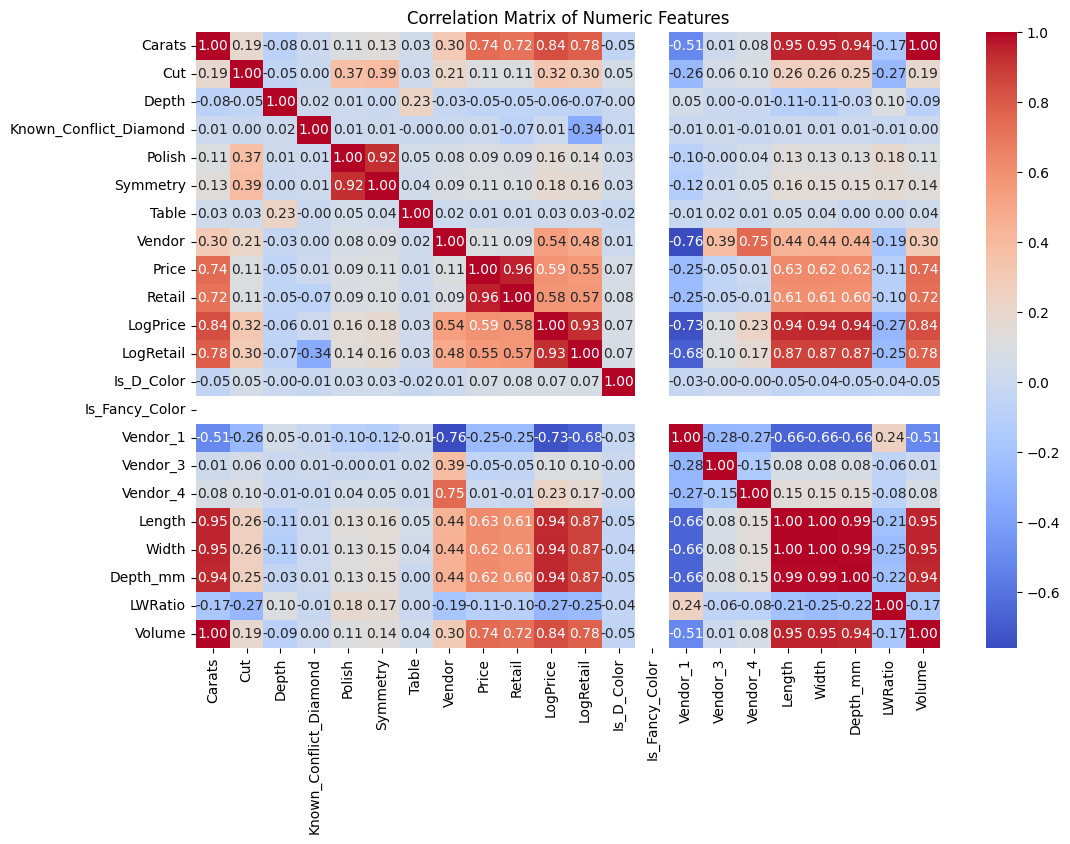

In [124]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float', 'int']).columns
corr_matrix = df[numeric_cols].corr()

# Display the matrix
print(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [41]:
df.isna().sum()

Carats                       0
Cert                         0
Clarity                      0
Color                        0
Cut                          0
Depth                     1440
Known_Conflict_Diamond       0
Measurements                 0
Polish                       0
Regions                      0
Shape                        0
Symmetry                     0
Table                     2531
Vendor                       0
Price                        0
Retail                       0
LogPrice                     0
LogRetail                    0
Color_Consolidated           0
Is_D_Color                   0
Is_Fancy_Color               0
Vendor_1                     0
Vendor_3                     0
Vendor_4                     0
Length                       0
Width                        0
Depth_mm                     0
LWRatio                      0
Volume                       0
dtype: int64

In [42]:
len(df)

8049

In [125]:
df["Depth_calc"] = (df["Depth_mm"] / ((df["Length"] + df["Width"]) / 2)) * 100
offers["Depth_calc"] = (offers["Depth_mm"] / ((offers["Length"] + offers["Width"]) / 2)) * 100

In [44]:
df

,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,...,Is_Fancy_Color,Vendor_1,Vendor_3,Vendor_4,Length,Width,Depth_mm,LWRatio,Volume,Depth_calc
0,0.41,Unknown,SI1,L,0,65.4,0,4.65x4.62x3.03,3,Other/Unknown,...,0,1,0,0,4.65,4.62,3.03,1.006494,65.093490,65.372168
1,0.42,AGSL,SI2,L,0,61.7,0,4.85x4.79x2.98,4,Russia,...,0,1,0,0,4.85,4.79,2.98,1.012526,69.229870,61.825726
2,0.40,AGSL,SI1,L,0,64.0,0,4.66x4.63x2.97,4,South Africa,...,0,1,0,0,4.66,4.63,2.97,1.006479,64.080126,63.939720
3,0.41,AGSL,SI2,L,0,62.7,0,4.71x4.69x2.95,3,Botswana,...,0,1,0,0,4.71,4.69,2.95,1.004264,65.165205,62.765957
4,0.40,AGSL,SI1,L,0,63.0,0,4.71x4.68x2.96,4,Botswana,...,0,1,0,0,4.71,4.68,2.96,1.006410,65.246688,63.045793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,3.51,AGSL,VS1,D,4,61.3,0,9.75x9.82x6.03,4,DR Congo,...,0,0,0,0,9.75,9.82,6.03,0.992872,577.342350,61.624936
8046,3.51,Unknown,SI2,H,4,62.3,0,9.72x9.78x6.07,4,Other/Unknown,...,0,0,0,0,9.72,9.78,6.07,0.993865,577.023912,62.256410
8047,7.62,AGSL,IF,H,4,NaN,0,12.6x12.68x7.74,4,South Africa,...,0,0,0,0,12.60,12.68,7.74,0.993691,1236.604320,61.234177
8048,1.49,AGSL,VS1,K,3,NaN,0,7.22x7.34x4.53,2,Russia,...,0,0,1,0,7.22,7.34,4.53,0.983651,240.066444,62.225275


In [126]:
clarity_order = {
    'I3': 1, 'I2': 2, 'I1': 3,
    'SI2': 4, 'SI1': 5,
    'VS2': 6, 'VS1': 7,
    'VVS2': 8, 'VVS1': 9,
    'IF': 10, 'FL': 11
}

# Apply mapping
df['Clarity_Ord'] = df['Clarity'].map(clarity_order)
offers['Clarity_Ord'] = offers['Clarity'].map(clarity_order)

In [127]:
df['Clarity_centered'] = df['Clarity_Ord'] - df['Clarity_Ord'].median()
offers['Clarity_centered'] = offers['Clarity_Ord'] - offers['Clarity_Ord'].median()



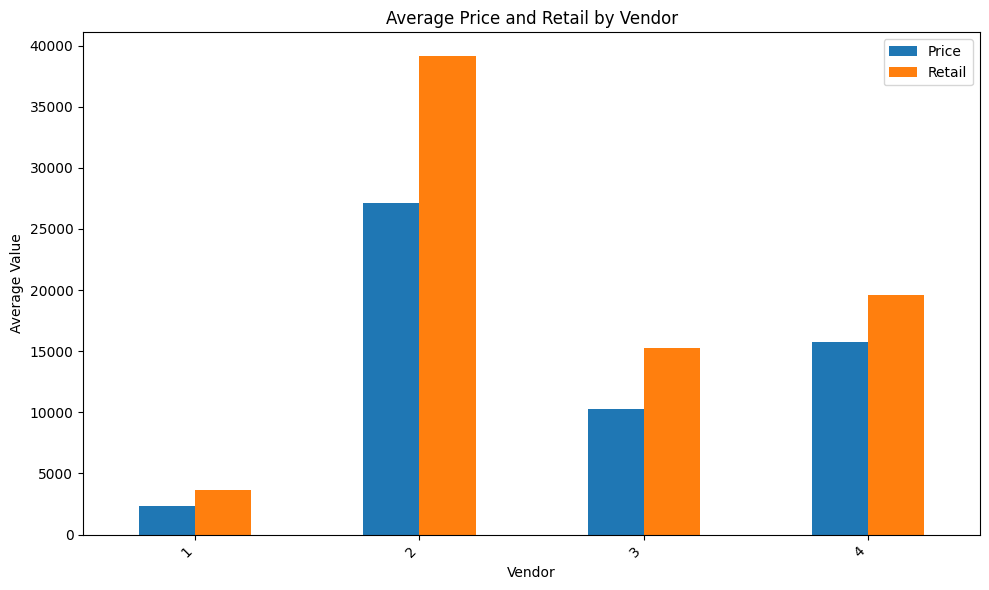

In [47]:
import matplotlib.pyplot as plt

# Group by vendor and compute average price + retail
avg_by_vendor = df.groupby("Vendor")[["Price", "Retail"]].mean().reset_index()

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(10,6))
avg_by_vendor.plot(x="Vendor", y=["Price", "Retail"], kind="bar", ax=ax)

plt.title("Average Price and Retail by Vendor")
plt.ylabel("Average Value")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [48]:
df["ROI"] = ((df["Retail"] - df["Price"]) / df["Price"]) * 100


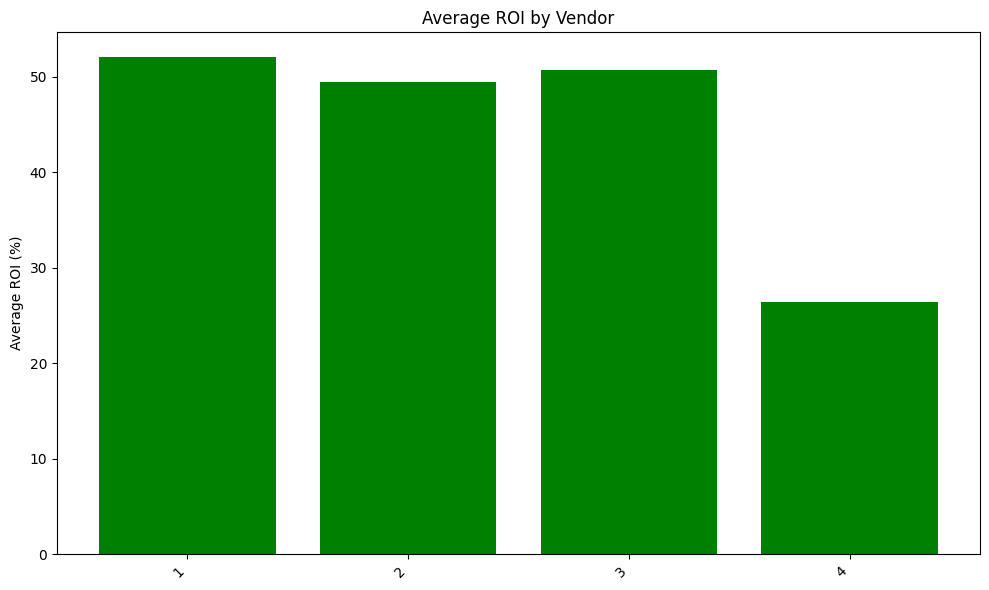

In [49]:
# Convert Vendor to categorical
df["Vendor"] = df["Vendor"].astype(str)  # or .astype('category')

# Then calculate ROI
df["ROI"] = ((df["Retail"] - df["Price"]) / df["Price"]) * 100

# Group by Vendor and compute average ROI
avg_roi = df.groupby("Vendor")["ROI"].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(avg_roi["Vendor"], avg_roi["ROI"], color="green")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average ROI (%)")
plt.title("Average ROI by Vendor")
plt.tight_layout()
plt.show()


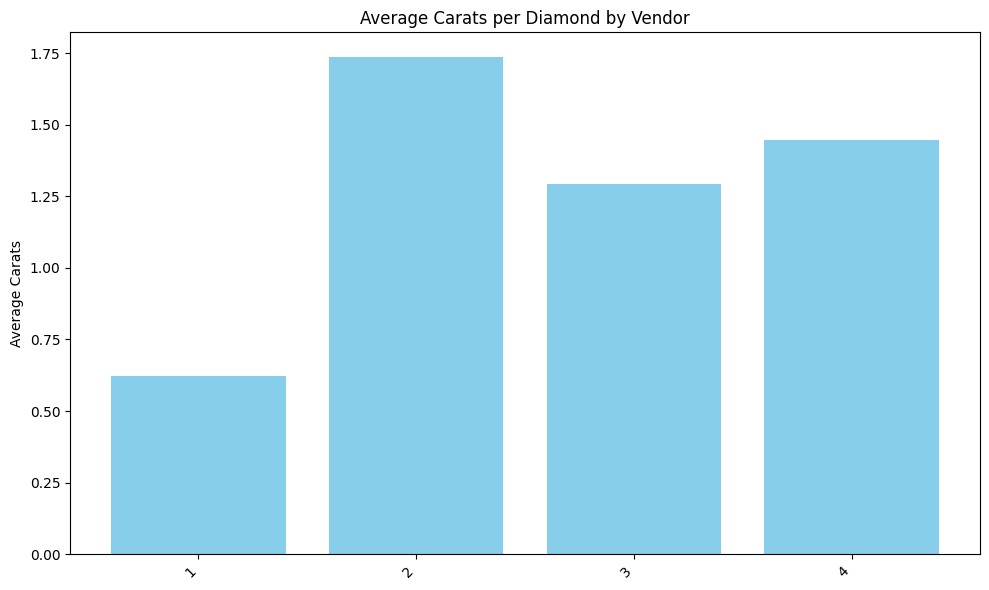

In [51]:
import matplotlib.pyplot as plt

# Ensure Vendor is treated as categorical
df["Vendor"] = df["Vendor"].astype(str)

# Group by Vendor and calculate average carat
avg_carat = df.groupby("Vendor")["Carats"].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(avg_carat["Vendor"], avg_carat["Carats"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Carats")
plt.title("Average Carats per Diamond by Vendor")
plt.tight_layout()
plt.show()


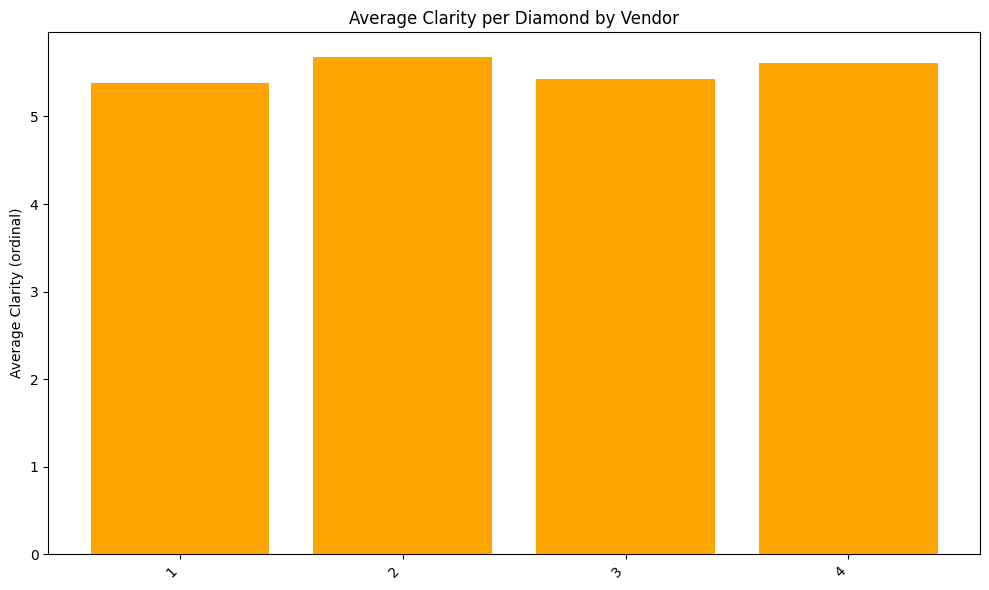

In [52]:
import matplotlib.pyplot as plt

# Ensure Vendor is categorical
df["Vendor"] = df["Vendor"].astype(str)

# Group by Vendor and calculate average clarity
avg_clarity = df.groupby("Vendor")["Clarity_Ord"].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(avg_clarity["Vendor"], avg_clarity["Clarity_Ord"], color="orange")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Clarity (ordinal)")
plt.title("Average Clarity per Diamond by Vendor")
plt.tight_layout()
plt.show()


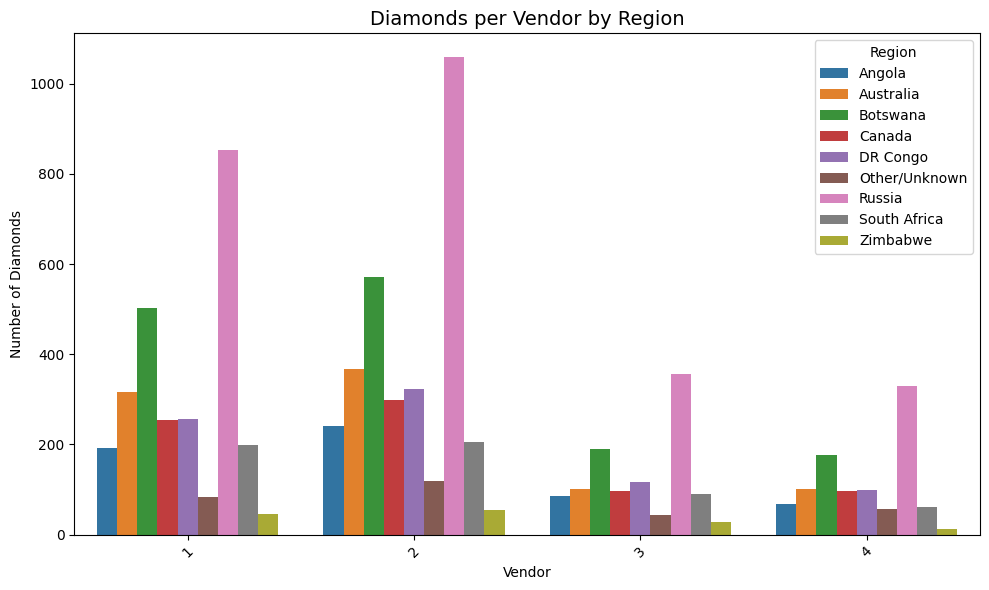

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count diamonds per vendor/region
counts = df.groupby(["Vendor", "Regions"]).size().reset_index(name="Diamonds")

plt.figure(figsize=(10,6))
sns.barplot(
    data=counts,
    x="Vendor",
    y="Diamonds",
    hue="Regions"
)

plt.title("Diamonds per Vendor by Region", fontsize=14)
plt.xlabel("Vendor")
plt.ylabel("Number of Diamonds")
plt.legend(title="Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


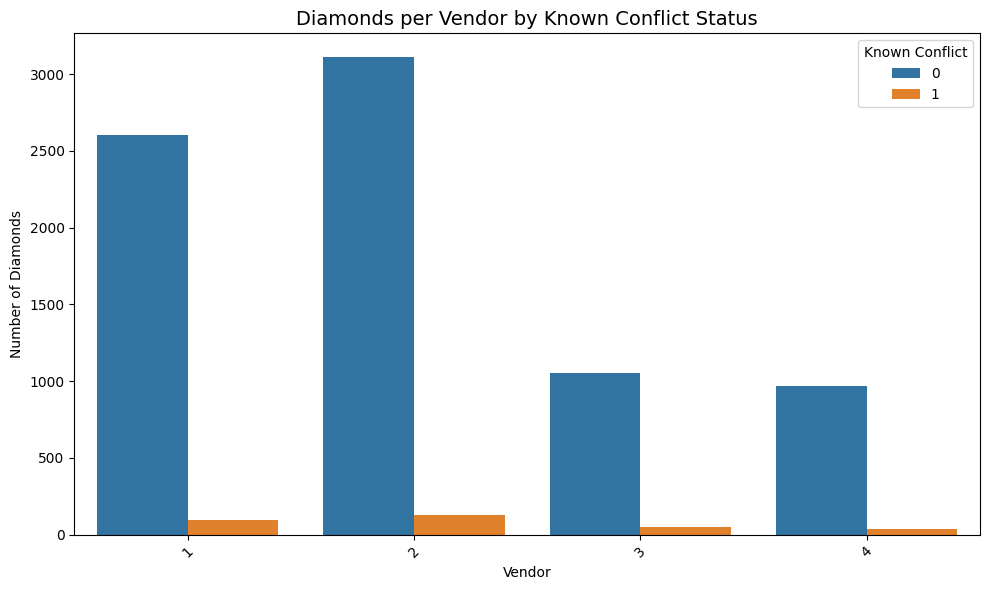

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count diamonds per vendor/conflict status
counts = df.groupby(["Vendor", "Known_Conflict_Diamond"]).size().reset_index(name="Diamonds")

plt.figure(figsize=(10,6))
sns.barplot(
    data=counts,
    x="Vendor",
    y="Diamonds",
    hue="Known_Conflict_Diamond"
)

plt.title("Diamonds per Vendor by Known Conflict Status", fontsize=14)
plt.xlabel("Vendor")
plt.ylabel("Number of Diamonds")
plt.legend(title="Known Conflict")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


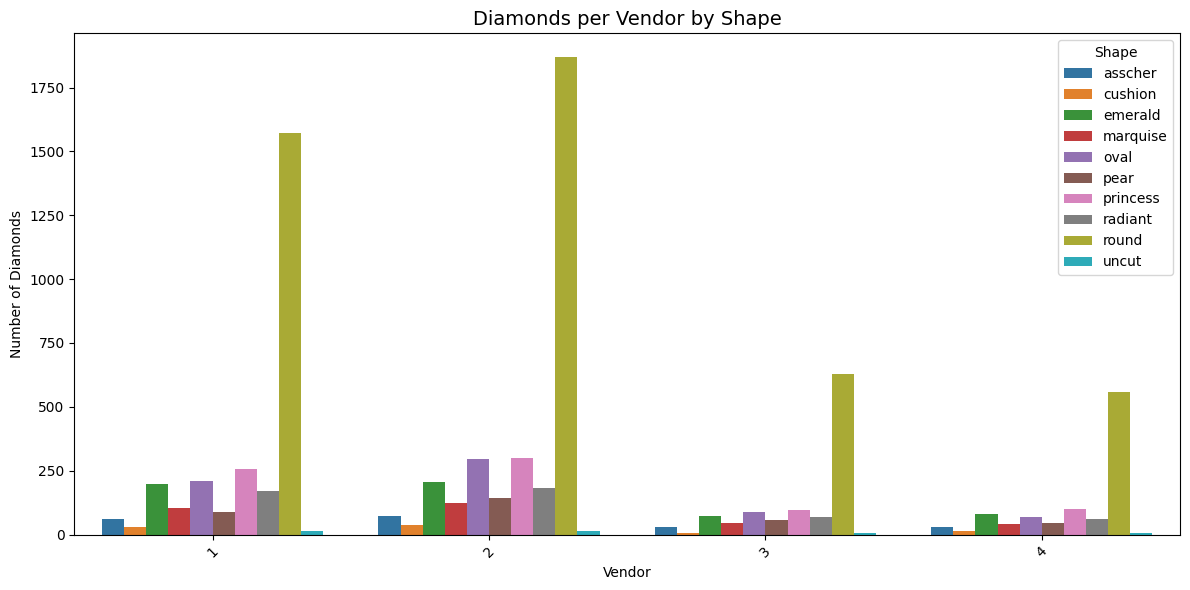

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count diamonds per vendor/shape
counts = df.groupby(["Vendor", "Shape"]).size().reset_index(name="Diamonds")

plt.figure(figsize=(12,6))
sns.barplot(
    data=counts,
    x="Vendor",
    y="Diamonds",
    hue="Shape"
)

plt.title("Diamonds per Vendor by Shape", fontsize=14)
plt.xlabel("Vendor")
plt.ylabel("Number of Diamonds")
plt.legend(title="Shape")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
df


,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,...,Vendor_3,Vendor_4,Length,Width,Depth_mm,LWRatio,Volume,Depth_calc,Clarity_Ord,Clarity_centered
0,0.41,Unknown,SI1,L,0,65.4,0,4.65x4.62x3.03,3,Other/Unknown,...,0,0,4.65,4.62,3.03,1.006494,65.093490,65.372168,5.0,0.0
1,0.42,AGSL,SI2,L,0,61.7,0,4.85x4.79x2.98,4,Russia,...,0,0,4.85,4.79,2.98,1.012526,69.229870,61.825726,4.0,-1.0
2,0.40,AGSL,SI1,L,0,64.0,0,4.66x4.63x2.97,4,South Africa,...,0,0,4.66,4.63,2.97,1.006479,64.080126,63.939720,5.0,0.0
3,0.41,AGSL,SI2,L,0,62.7,0,4.71x4.69x2.95,3,Botswana,...,0,0,4.71,4.69,2.95,1.004264,65.165205,62.765957,4.0,-1.0
4,0.40,AGSL,SI1,L,0,63.0,0,4.71x4.68x2.96,4,Botswana,...,0,0,4.71,4.68,2.96,1.006410,65.246688,63.045793,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,3.51,AGSL,VS1,D,4,61.3,0,9.75x9.82x6.03,4,DR Congo,...,0,0,9.75,9.82,6.03,0.992872,577.342350,61.624936,7.0,2.0
8046,3.51,Unknown,SI2,H,4,62.3,0,9.72x9.78x6.07,4,Other/Unknown,...,0,0,9.72,9.78,6.07,0.993865,577.023912,62.256410,4.0,-1.0
8047,7.62,AGSL,IF,H,4,NaN,0,12.6x12.68x7.74,4,South Africa,...,0,0,12.60,12.68,7.74,0.993691,1236.604320,61.234177,10.0,5.0
8048,1.49,AGSL,VS1,K,3,NaN,0,7.22x7.34x4.53,2,Russia,...,1,0,7.22,7.34,4.53,0.983651,240.066444,62.225275,7.0,2.0


In [128]:
# Build Model 1 DataFrame
model1_features = [
    "Carats",
    "Cut",
    "Clarity_centered",
    "Known_Conflict_Diamond",
    "Polish",
    "Symmetry",
    "Table",
    "LWRatio",
    "Depth_calc",
    "Is_D_Color",
    "Is_Fancy_Color",
    "Vendor_1",
    "Vendor_3",
    "Vendor_4",
    "Price",
    "Retail",
    "LogPrice",
    "LogRetail"
]

df_model1 = df[model1_features].copy()

In [129]:
df_model1.isna().sum()

Carats                       0
Cut                          0
Clarity_centered             2
Known_Conflict_Diamond       0
Polish                       0
Symmetry                     0
Table                     2531
LWRatio                      0
Depth_calc                   0
Is_D_Color                   0
Is_Fancy_Color               0
Vendor_1                     0
Vendor_3                     0
Vendor_4                     0
Price                        0
Retail                       0
LogPrice                     0
LogRetail                    0
dtype: int64

For now drop missing table data

In [130]:
df_model1 = df_model1.dropna()

In [131]:
df_model1.isna().sum()

Carats                    0
Cut                       0
Clarity_centered          0
Known_Conflict_Diamond    0
Polish                    0
Symmetry                  0
Table                     0
LWRatio                   0
Depth_calc                0
Is_D_Color                0
Is_Fancy_Color            0
Vendor_1                  0
Vendor_3                  0
Vendor_4                  0
Price                     0
Retail                    0
LogPrice                  0
LogRetail                 0
dtype: int64

                          Carats       Cut  Clarity_centered  \
Carats                  1.000000  0.189015          0.041511   
Cut                     0.189015  1.000000         -0.110700   
Clarity_centered        0.041511 -0.110700          1.000000   
Known_Conflict_Diamond  0.002697  0.013407         -0.007239   
Polish                  0.115557  0.367835          0.017980   
Symmetry                0.136088  0.387776          0.005666   
Table                   0.032341  0.022812          0.013670   
LWRatio                -0.184834 -0.293728          0.031049   
Depth_calc             -0.109277 -0.095685         -0.013127   
Is_D_Color             -0.056868  0.042786          0.080792   
Is_Fancy_Color               NaN       NaN               NaN   
Vendor_1               -0.502106 -0.259102         -0.082507   
Vendor_3                0.014802  0.064498         -0.015827   
Vendor_4                0.077619  0.092553          0.023873   
Price                   0.782377  0.1240

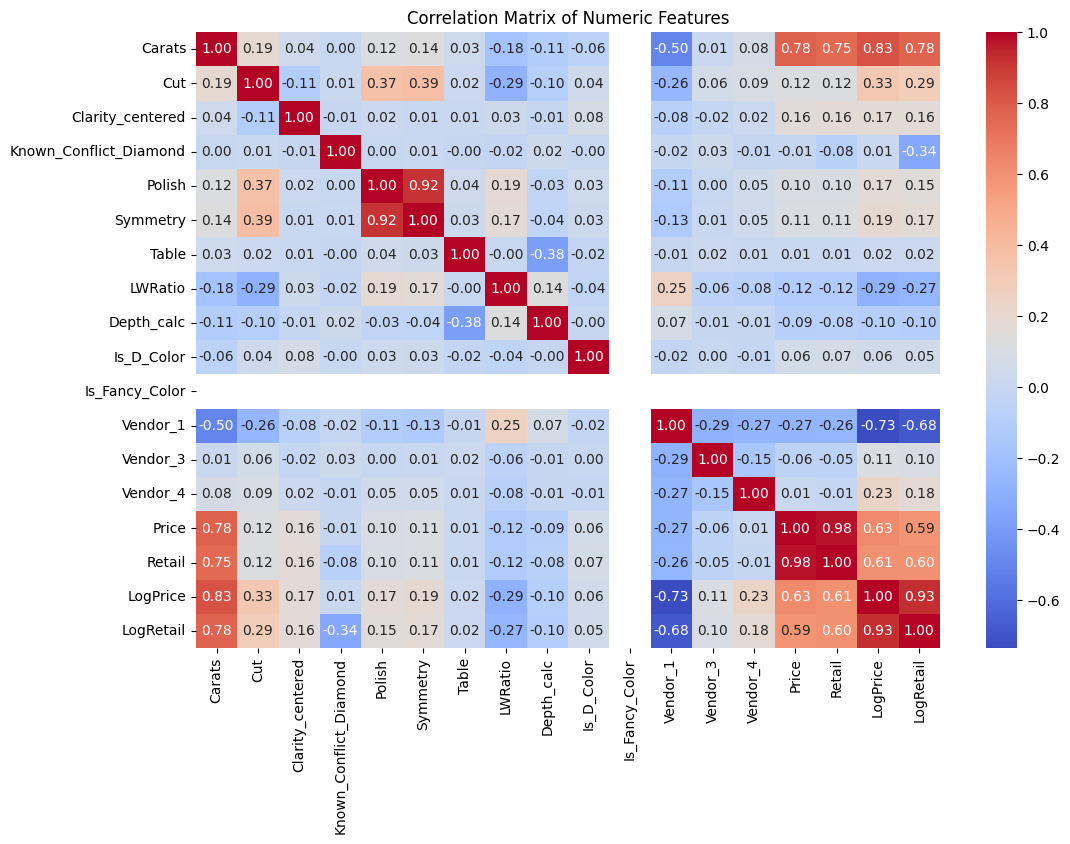

In [132]:
# Select only numeric columns
corr_matrix = df_model1.corr()

# Display the matrix
print(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [133]:
df_model2 = df.copy()
df_model2 = df_model2.drop(['Vendor_1', 'Vendor_3', 'Vendor_4'], axis = 1)

In [134]:
# Create dummies for Cert column
cert_dummies = pd.get_dummies(df_model2["Cert"], prefix="Cert")

# Add to dataframe
df_model2 = pd.concat([df_model2, cert_dummies], axis=1)

# Create dummies for Cert column
cert_dummies = pd.get_dummies(offers["Cert"], prefix="Cert")

# Add to dataframe
offers = pd.concat([offers, cert_dummies], axis=1)

In [135]:
# Create dummies for Cert column
cert_dummies = pd.get_dummies(df_model2["Color_Consolidated"], prefix="Color")

# Add to dataframe
df_model2 = pd.concat([df_model2, cert_dummies], axis=1)

# Create dummies for Cert column
cert_dummies = pd.get_dummies(offers["Color_Consolidated"], prefix="Color")

# Add to dataframe
offers = pd.concat([offers, cert_dummies], axis=1)


In [136]:
# Create dummies for Cert column
cert_dummies = pd.get_dummies(df_model2["Regions"], prefix="Region")

# Add to dataframe
df_model2 = pd.concat([df_model2, cert_dummies], axis=1)

# Create dummies for Cert column
cert_dummies = pd.get_dummies(offers["Regions"], prefix="Region")

# Add to dataframe
offers = pd.concat([offers, cert_dummies], axis=1)



In [137]:
# Create dummies for Cert column
cert_dummies = pd.get_dummies(df_model2["Shape"], prefix="Shape")

# Add to dataframe
df_model2 = pd.concat([df_model2, cert_dummies], axis=1)

# Create dummies for Cert column
cert_dummies = pd.get_dummies(offers["Shape"], prefix="Shape")

# Add to dataframe
offers = pd.concat([offers, cert_dummies], axis=1)



In [138]:
# Create dummies for Cert column
cert_dummies = pd.get_dummies(df_model2["Vendor"], prefix="Vendor")

# Add to dataframe
df_model2 = pd.concat([df_model2, cert_dummies], axis=1)

# Create dummies for Cert column
cert_dummies = pd.get_dummies(offers["Vendor"], prefix="Vendor")

# Add to dataframe
offers = pd.concat([offers, cert_dummies], axis=1)



In [139]:
# Make pandas display all columns
pd.set_option('display.max_columns', None)
df_model2 = df_model2.drop(['Clarity', 'Depth', 'Cert', 'Color', 'Color_Consolidated', 'Is_Fancy_Color',
                            'Is_D_Color', 'Measurements', 'Regions', 'Shape', 'Vendor'], axis = 1)

In [140]:
df_model2 = df_model2.drop(['Clarity_Ord'], axis = 1)

In [141]:
offers = offers.drop(['Clarity_Ord'], axis = 1)

In [142]:
df_model2 = df_model2.dropna(subset=["Clarity_centered"])

                          Carats       Cut  Known_Conflict_Diamond    Polish  \
Carats                  1.000000  0.185818                0.005324  0.111625   
Cut                     0.185818  1.000000                0.002336  0.372521   
Known_Conflict_Diamond  0.005324  0.002336                1.000000  0.006504   
Polish                  0.111625  0.372521                0.006504  1.000000   
Symmetry                0.134393  0.390923                0.012407  0.918713   
Table                   0.034383  0.025535               -0.003005  0.050753   
Price                   0.741275  0.110308                0.007801  0.094267   
Retail                  0.716301  0.107045               -0.074190  0.090429   
LogPrice                0.838804  0.323942                0.010216  0.155499   
LogRetail               0.781489  0.296376               -0.340462  0.140319   
Length                  0.949646  0.258024                0.007118  0.133470   
Width                   0.948163  0.2647

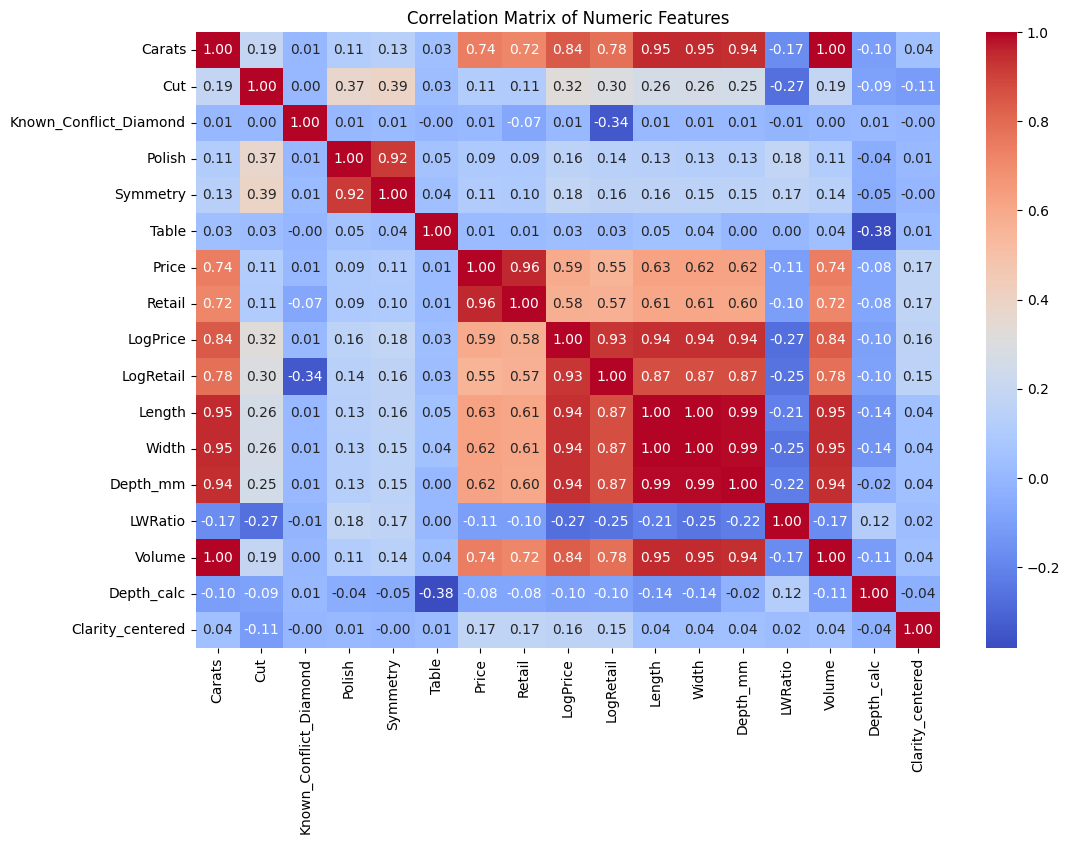

In [143]:
# Select only numeric columns
numeric_cols = df_model2.select_dtypes(include=['float', 'int']).columns
corr_matrix = df[numeric_cols].corr()

# Display the matrix
print(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [144]:
df_model2.isna().sum()

Carats                       0
Cut                          0
Known_Conflict_Diamond       0
Polish                       0
Symmetry                     0
Table                     2530
Price                        0
Retail                       0
LogPrice                     0
LogRetail                    0
Length                       0
Width                        0
Depth_mm                     0
LWRatio                      0
Volume                       0
Depth_calc                   0
Clarity_centered             0
Cert_AGSL                    0
Cert_GemEx                   0
Cert_Unknown                 0
Color_D                      0
Color_E                      0
Color_F                      0
Color_Fancy                  0
Color_G                      0
Color_H                      0
Color_I                      0
Color_J                      0
Color_K                      0
Color_L                      0
Color_Light                  0
Color_M                      0
Color_Ve

In [145]:
offers = offers.drop(['Clarity', 'Depth', 'Cert', 'Color', 'Color_Consolidated', 'Measurements', 'Regions', 'Shape', 'Vendor'], axis = 1)

In [73]:
offers.isna().sum()

id                           0
Carats                       0
Cut                          0
Known_Conflict_Diamond     429
Polish                       0
Symmetry                     0
Table                      856
Offers                    2683
Length                       0
Width                        0
Depth_mm                     0
LWRatio                      0
Volume                       0
Depth_calc                   0
Clarity_centered             0
Cert_AGSL                    0
Cert_GemEx                   0
Cert_Unknown                 0
Color_D                      0
Color_E                      0
Color_F                      0
Color_Fancy                  0
Color_G                      0
Color_H                      0
Color_I                      0
Color_J                      0
Color_K                      0
Color_L                      0
Color_Light                  0
Color_M                      0
Color_Very Light             0
Region_Angola                0
Region_A

In [146]:
df_model3 = df_model2.copy()

In [147]:
df_model4 = df_model2.copy()

In [148]:
df_model4 = df_model4.drop('Known_Conflict_Diamond', axis= 1)

In [99]:
bool_cols = df_model2.select_dtypes(include=['bool']).columns
df_model2[bool_cols] = df_model2[bool_cols].astype(int)

In [315]:
df_model2
df_model2 = df_model2.select_dtypes(include=np.number)


In [316]:
bool_cols = offers.select_dtypes(include=['bool']).columns
offers[bool_cols] = offers[bool_cols].astype(int)

In [317]:
offers = offers.select_dtypes(include=np.number)


In [ ]:
offers.isna().sum()

In [319]:
offers = offers.drop('Offers', axis = 1)

In [209]:
offers = offers.dropna()

In [210]:
offers

,Carats,Cut,Depth,Known_Conflict_Diamond,Polish,Symmetry,Table,Vendor,Length,Width,Depth_mm,LWRatio,Volume,Depth_calc,Clarity_Ord,Clarity_centered,Cert_AGSL,Cert_GemEx,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J,Color_K,Color_L,Color_M,Color_N,Color_T,Region_Angola,Region_Australia,Region_Botswana,Region_Canada,Region_DR Congo,Region_Other/Unknown,Region_Russia,Region_South Africa,Region_Zimbabwe,Shape_Asscher,Shape_Cushion,Shape_Emerald,Shape_Marquis,Shape_Marquise,Shape_Oval,Shape_Oval,Shape_Pear,Shape_Princess,Shape_ROUND,Shape_Radiant,Shape_Round,Shape_Uncut,Vendor_1,Vendor_2,Vendor_3,Vendor_4
2,0.41,0,62.2,1,4,3,58.0,1,4.76,4.74,2.95,1.004219,66.559080,62.105263,4,-1.567213,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,0.40,0,64.2,0,3,3,58.0,1,4.63,4.59,2.96,1.008715,62.905032,64.208243,5,-0.567213,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,0.41,0,61.3,0,3,4,59.0,1,4.80,4.77,2.93,1.006289,67.085280,61.233020,5,-0.567213,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
9,0.40,0,62.7,0,2,3,57.0,1,4.75,4.69,2.96,1.012793,65.941400,62.711864,5,-0.567213,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
24,0.40,0,60.2,0,4,3,61.0,1,4.81,4.77,2.88,1.008386,66.077856,60.125261,9,3.432787,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,1.02,4,62.8,0,4,4,57.0,2,6.42,6.44,4.04,0.996894,167.032992,62.830482,5,-0.567213,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2617,2.36,4,63.0,1,4,4,55.0,2,8.50,8.45,5.33,1.005917,382.827250,62.890855,4,-1.567213,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2624,2.14,4,62.3,0,4,4,59.0,2,8.18,8.25,5.12,0.991515,345.523200,62.325015,4,-1.567213,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2673,1.01,3,62.2,0,3,2,60.0,2,6.30,6.33,3.93,0.995261,156.724470,62.232779,4,-1.567213,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


# Model Building

### Linear Regression

In [110]:
#Imports
from sklearn.model_selection import train_test_split
df_lr = df_model1.copy()

X = df_lr[["Carats", "Known_Conflict_Diamond", "Cut", "Polish", 
           "Symmetry", "Table", "LWRatio", "Depth_calc", "Clarity_centered",
           "Is_D_Color", "Vendor_1", "Vendor_3", "Vendor_4"]]
y = df_lr["LogPrice"]

# Split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
lr_model = LinearRegression()

# Fit on training data
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse:.4f}")
print(f"Linear Regression R^2: {r2:.4f}")


Linear Regression MSE: 0.1903
Linear Regression R^2: 0.8713


In [111]:
import statsmodels.api as sm

# Features (already encoded)
X_sm = X_train.copy()

# Add constant term for intercept
X_sm = sm.add_constant(X_sm)

# Fit OLS model
model = sm.OLS(y_train, X_sm).fit()

# Show full summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     2035.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        09:05:37   Log-Likelihood:                -2844.5
No. Observations:                4413   AIC:                             5717.
Df Residuals:                    4399   BIC:                             5806.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     21

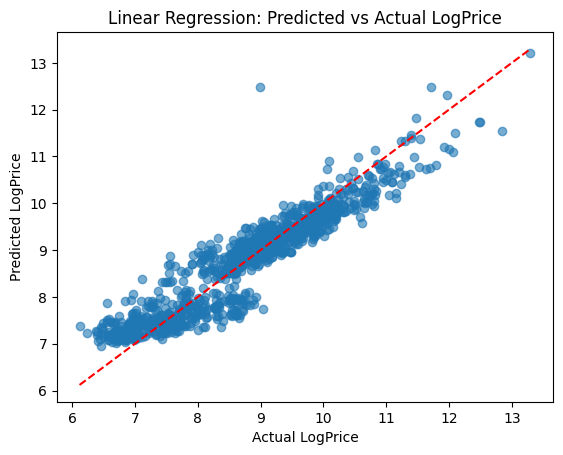

In [112]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual LogPrice")
plt.ylabel("Predicted LogPrice")
plt.title("Linear Regression: Predicted vs Actual LogPrice")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


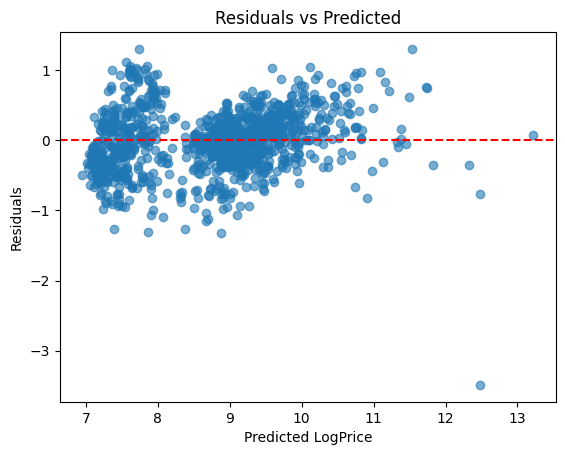

In [113]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted LogPrice")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Drop the dependent variable and any constants
X_vif = X_train.copy()
X_vif = sm.add_constant(X_vif)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) 
                   for i in range(X_vif.shape[1])]

print(vif_data)


                   Feature           VIF
0                    const  33618.413375
1                   Carats      1.407123
2   Known_Conflict_Diamond      1.003609
3                      Cut      1.489347
4                   Polish      6.348833
5                 Symmetry      6.381867
6                    Table      1.213331
7                  LWRatio      1.369403
8               Depth_calc      1.242084
9         Clarity_centered      1.042285
10              Is_D_Color      1.019904
11                Vendor_1      1.758927
12                Vendor_3      1.206014
13                Vendor_4      1.162193


In [117]:
df_model1["CutQuality"] = (
    df_model1["Cut"] + df_model1["Polish"] + df_model1["Symmetry"]
) / 3

X = df_model1[["Carats", "CutQuality", "Clarity_centered", 
           "Is_D_Color", "Vendor_1"]]
y = df_model1["LogPrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize model
lr_model = LinearRegression()

# Fit on training data
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse:.4f}")
print(f"Linear Regression R^2: {r2:.4f}")


Linear Regression MSE: 0.1962
Linear Regression R^2: 0.8674


In [118]:
import statsmodels.api as sm

# Features (already encoded)
X_sm = X_train.copy()

# Add constant term for intercept
X_sm = sm.add_constant(X_sm)

# Fit OLS model
model = sm.OLS(y_train, X_sm).fit()

# Show full summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     4748.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        09:05:59   Log-Likelihood:                -3050.8
No. Observations:                4413   AIC:                             6114.
Df Residuals:                    4407   BIC:                             6152.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.7962      0.025  

In [119]:
df_model1["Carats^2"] = df_model1["Carats"] ** 2
df_model1["Carats^3"] = df_model1["Carats"] ** 3

In [120]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Features and target
X = df_model1[["Carats", "CutQuality", "Clarity_centered", "Is_D_Color", "Carats^2", "Carats^3", 
           "Vendor_1"]]
y = df_model1["LogPrice"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize model
lr_model = LinearRegression()

# Fit on training data
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse:.4f}")
print(f"Linear Regression R^2: {r2:.4f}")


# Reset indices for statsmodels
X_train_sm = sm.add_constant(X_train.reset_index(drop=True))
y_train_sm = y_train.reset_index(drop=True)

X_test_sm = sm.add_constant(X_test.reset_index(drop=True))

# Fit OLS
ols_model = sm.OLS(y_train_sm, X_train_sm).fit()
print(ols_model.summary())

# Predictions
y_train_pred = ols_model.predict(X_train_sm)
y_test_pred = ols_model.predict(X_test_sm)


Linear Regression MSE: 0.1045
Linear Regression R^2: 0.9293
                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     8409.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        09:06:05   Log-Likelihood:                -1262.7
No. Observations:                4413   AIC:                             2541.
Df Residuals:                    4405   BIC:                             2592.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

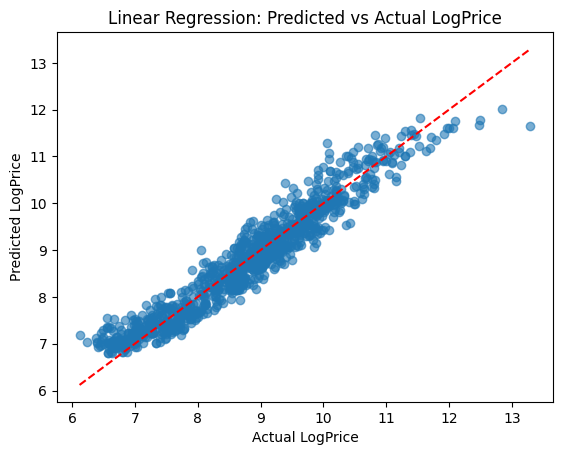

In [121]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual LogPrice")
plt.ylabel("Predicted LogPrice")
plt.title("Linear Regression: Predicted vs Actual LogPrice")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


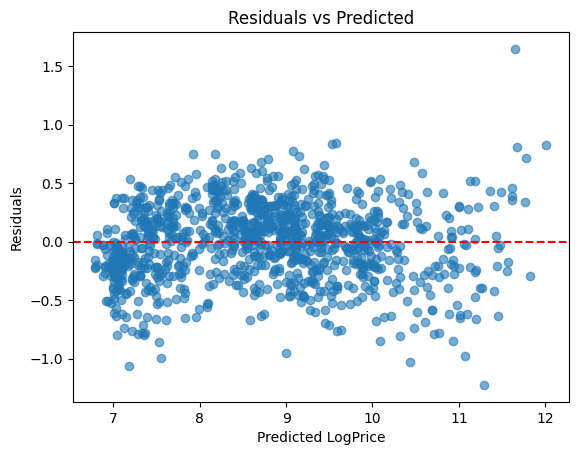

In [122]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted LogPrice")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


                          Carats       Cut  Clarity_centered  \
Carats                  1.000000  0.189015          0.041511   
Cut                     0.189015  1.000000         -0.110700   
Clarity_centered        0.041511 -0.110700          1.000000   
Known_Conflict_Diamond  0.002697  0.013407         -0.007239   
Polish                  0.115557  0.367835          0.017980   
Symmetry                0.136088  0.387776          0.005666   
Table                   0.032341  0.022812          0.013670   
LWRatio                -0.184834 -0.293728          0.031049   
Depth_calc             -0.109277 -0.095685         -0.013127   
Is_D_Color             -0.056868  0.042786          0.080792   
Is_Fancy_Color               NaN       NaN               NaN   
Vendor_1               -0.502106 -0.259102         -0.082507   
Vendor_3                0.014802  0.064498         -0.015827   
Vendor_4                0.077619  0.092553          0.023873   
Price                   0.782377  0.1240

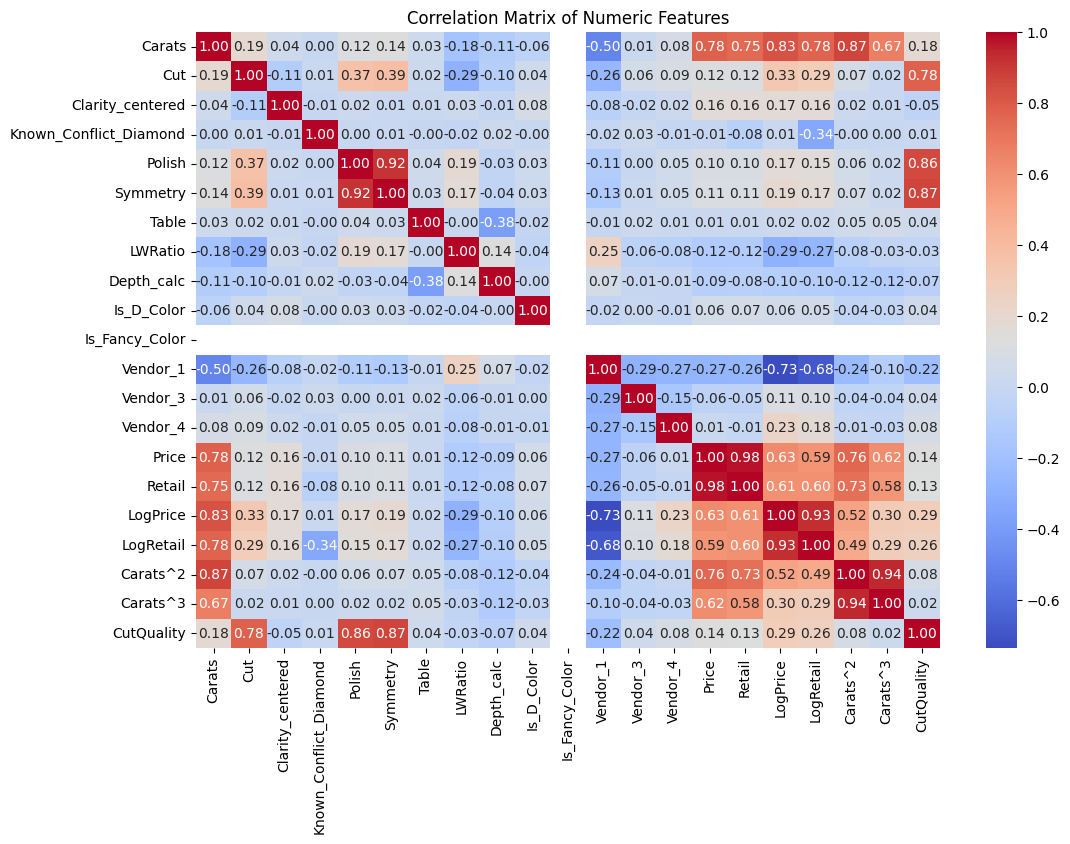

In [123]:
# Select only numeric columns
corr_matrix = df_model1.corr()

# Display the matrix
print(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [124]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Features and target
X = df_model1[["Carats", "CutQuality", "Clarity_centered", "Is_D_Color", "Carats^2", "Carats^3", 
            "Vendor_1", "Vendor_4"]]
y = df_model1["LogPrice"]

# Initialize model
lr_model = LinearRegression()

# Define 5-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define MSE scorer (negative because scikit-learn maximizes the score)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Compute cross-validated MSE
cv_mse = cross_val_score(lr_model, X, y, cv=kf, scoring=mse_scorer)

# Compute cross-validated R^2
cv_r2 = cross_val_score(lr_model, X, y, cv=kf, scoring='r2')

print(f"10-Fold CV MSE: {-np.mean(cv_mse):.4f} ± {np.std(cv_mse):.4f}")
print(f"10-Fold CV R^2: {np.mean(cv_r2):.4f} ± {np.std(cv_r2):.4f}")


10-Fold CV MSE: 0.1035 ± 0.0133
10-Fold CV R^2: 0.9303 ± 0.0087


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Features and target
X = df_model1[["Carats", "CutQuality", "Clarity_centered", "Is_D_Color", "Carats^2", "Carats^3",
           "Vendor_1", "Vendor_4"]]
y = df_model1["LogPrice"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and fit model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Compute R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")


Training R²: 0.9327
Test R²: 0.9323


In [126]:
#Imports
from sklearn.model_selection import train_test_split
df_lr = df_model1.copy()

X = df_lr[["Carats", "Known_Conflict_Diamond", "Cut", 
             "Clarity_centered",
           "Is_D_Color", "Vendor_1"]]
y = df_lr["LogRetail"]

# Split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
lr_model = LinearRegression()

# Fit on training data
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse:.4f}")
print(f"Linear Regression R^2: {r2:.4f}")

import statsmodels.api as sm

# Features (already encoded)
X_sm = X_train.copy()

# Add constant term for intercept
X_sm = sm.add_constant(X_sm)

# Fit OLS model
model = sm.OLS(y_train, X_sm).fit()

# Show full summary
print(model.summary())


Linear Regression MSE: 0.1962
Linear Regression R^2: 0.8746
                            OLS Regression Results                            
Dep. Variable:              LogRetail   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     4279.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        09:06:25   Log-Likelihood:                -3114.6
No. Observations:                4413   AIC:                             6243.
Df Residuals:                    4406   BIC:                             6288.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Drop the dependent variable and any constants
X_vif = X_train.copy()
X_vif = sm.add_constant(X_vif)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) 
                   for i in range(X_vif.shape[1])]

print(vif_data)


                  Feature       VIF
0                   const  7.076789
1                  Carats  1.327842
2  Known_Conflict_Diamond  1.000488
3                     Cut  1.098392
4        Clarity_centered  1.034838
5              Is_D_Color  1.015021
6                Vendor_1  1.379840


In [128]:
df_model1["Carats^2"] = df_model1["Carats"] ** 2
df_model1["Carats^3"] = df_model1["Carats"] ** 3


#Imports
from sklearn.model_selection import train_test_split
df_lr = df_model1.copy()

X = df_lr[["Carats", "Known_Conflict_Diamond",
            "Clarity_centered", "Cut",
           "Is_D_Color", "Vendor_1", "Carats^2", "Carats^3"]]
y = df_lr["LogRetail"]

# Split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
lr_model = LinearRegression()

# Fit on training data
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse:.4f}")
print(f"Linear Regression R^2: {r2:.4f}")

import statsmodels.api as sm

# Features (already encoded)
X_sm = X_train.copy()

# Add constant term for intercept
X_sm = sm.add_constant(X_sm)

# Fit OLS model
model = sm.OLS(y_train, X_sm).fit()

# Show full summary
print(model.summary())



Linear Regression MSE: 0.1222
Linear Regression R^2: 0.9219
                            OLS Regression Results                            
Dep. Variable:              LogRetail   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     6808.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        09:06:36   Log-Likelihood:                -1632.1
No. Observations:                4413   AIC:                             3282.
Df Residuals:                    4404   BIC:                             3340.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

### Random Forest

In [75]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

# Features and target
X = df_model2.drop(['Retail', 'Price', 'LogPrice', 'LogRetail'], axis=1)
y = df_model2["LogPrice"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define parameter grid
param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2"]
}

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=kf,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train best model
best_rf = grid_search.best_estimator_

# Evaluate
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

print(f"Training R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Training R²: 0.9962
Test R²: 0.9728


In [53]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import numpy as np

# Features and target
X = df_model2.drop(['Retail', 'Price', 'LogPrice', 'LogRetail'], axis=1)
y = df_model2["LogPrice"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define parameter grid for XGBoost
param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "gamma": [0, 1, 5]
}

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost Regressor
xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1,
    tree_method="hist"  # faster training, change to "gpu_hist" if you want GPU acceleration
)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=kf,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train best model
best_xgb_price = grid_search.best_estimator_

# Evaluate
y_train_pred = best_xgb_price.predict(X_train)
y_test_pred = best_xgb_price.predict(X_test)

print(f"Training R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Training R²: 0.9950
Test R²: 0.9916


In [321]:
# Make sure offers has the same features as training
missing_cols = set(X.columns) - set(offers.columns)

# Add the missing columns with 0s
for col in missing_cols:
    offers[col] = 0

# Reorder columns to match training exactly
offers = offers[X.columns]

# Now predict
offers["Predicted_LogPrice"] = best_xgb_price.predict(offers)
offers["Predicted_Price"] = np.exp(offers["Predicted_LogPrice"])


In [322]:
offers

,Carats,Cut,Polish,Symmetry,Table,Length,Width,Depth_mm,LWRatio,Volume,Depth_calc,Clarity_Ord,Clarity_centered,Cert_AGSL,Cert_GemEx,Cert_Unknown,Color_D,Color_E,Color_F,Color_Fdpink,Color_Fdy,Color_Ffcdbrown,Color_Ffcg,Color_Ffcly,Color_Ffcy,Color_Ffg,Color_Fiy,Color_Fiyellow,Color_Flyellow,Color_Fvyellow,Color_Fyellow,Color_G,Color_Gy,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Lb,Color_M,Color_N,Color_O-p,Color_P,Color_Q-r,Color_S,Color_U,Color_W,Vendor_1,Vendor_2,Vendor_3,Vendor_4,Predicted_LogPrice,Predicted_Price
0,0.42,0,4,4,57.0,4.81,4.78,3.01,1.006276,69.205318,62.773723,4,-1.491987,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,6.333074,562.884033
1,0.40,0,4,4,59.0,4.64,4.61,2.95,1.006508,63.101680,63.783784,6,0.508013,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.257806,522.072205
2,0.41,0,4,3,58.0,4.76,4.74,2.95,1.004219,66.559080,62.105263,4,-1.491987,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,6.306414,548.075806
3,0.40,0,3,3,58.0,4.63,4.59,2.96,1.008715,62.905032,64.208243,5,-0.491987,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6.362354,579.609375
4,0.40,0,4,3,NaN,4.67,4.62,2.99,1.010823,64.510446,64.370291,6,0.508013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,6.332740,562.696472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,1.65,4,4,4,60.0,7.79,7.83,4.56,0.994891,278.140392,58.386684,7,1.508013,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10.434511,34013.445312
2679,2.35,4,4,4,58.0,8.48,8.53,5.28,0.994138,381.925632,62.081129,4,-1.491987,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10.506199,36541.320312
2680,2.35,4,4,3,NaN,8.64,8.67,5.20,0.996540,389.525760,60.080878,4,-1.491987,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9.930627,20550.220703
2681,5.02,4,4,4,59.0,11.16,11.18,6.64,0.998211,828.464832,59.444942,3,-2.491987,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,11.042055,62445.855469


# Dual Price Model splitting on Known Confict Diamond

In [80]:
df_model2

,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,...,Shape_oval,Shape_pear,Shape_princess,Shape_radiant,Shape_round,Shape_uncut,Vendor_1,Vendor_2,Vendor_3,Vendor_4
0,0.41,Unknown,SI1,L,0,65.4,0,4.65x4.62x3.03,3,Other/Unknown,...,False,False,True,False,False,False,True,False,False,False
1,0.42,AGSL,SI2,L,0,61.7,0,4.85x4.79x2.98,4,Russia,...,False,False,False,False,False,False,True,False,False,False
2,0.40,AGSL,SI1,L,0,64.0,0,4.66x4.63x2.97,4,South Africa,...,False,False,False,False,True,False,True,False,False,False
3,0.41,AGSL,SI2,L,0,62.7,0,4.71x4.69x2.95,3,Botswana,...,False,False,False,False,True,False,True,False,False,False
4,0.40,AGSL,SI1,L,0,63.0,0,4.71x4.68x2.96,4,Botswana,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,3.51,AGSL,VS1,D,4,61.3,0,9.75x9.82x6.03,4,DR Congo,...,False,False,False,False,True,False,False,True,False,False
8046,3.51,Unknown,SI2,H,4,62.3,0,9.72x9.78x6.07,4,Other/Unknown,...,False,False,False,False,True,False,False,True,False,False
8047,7.62,AGSL,IF,H,4,NaN,0,12.6x12.68x7.74,4,South Africa,...,False,False,False,False,True,False,False,True,False,False
8048,1.49,AGSL,VS1,K,3,NaN,0,7.22x7.34x4.53,2,Russia,...,False,False,False,False,True,False,False,False,True,False


In [149]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import numpy as np

# Features and target
X = df_model3.drop(['Retail', 'Price', 'LogPrice', 'LogRetail'], axis=1)
y = df_model3["LogPrice"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define parameter grid for XGBoost
param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "gamma": [0, 1, 5]
}

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost Regressor
xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1,
    tree_method="hist"  # faster training, change to "gpu_hist" if you want GPU acceleration
)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=kf,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train best model
best_xgb_price1 = grid_search.best_estimator_

# Evaluate
y_train_pred = best_xgb_price1.predict(X_train)
y_test_pred = best_xgb_price1.predict(X_test)

print(f"Training R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
Training R²: 0.9947
Test R²: 0.9906


In [150]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import numpy as np

# Features and target
X = df_model4.drop(['Retail', 'Price', 'LogPrice', 'LogRetail'], axis=1)
y = df_model4["LogPrice"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define parameter grid for XGBoost
param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "gamma": [0, 1, 5]
}

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost Regressor
xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1,
    tree_method="hist"  # faster training, change to "gpu_hist" if you want GPU acceleration
)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=kf,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train best model
best_xgb_price2 = grid_search.best_estimator_

# Evaluate
y_train_pred = best_xgb_price2.predict(X_train)
y_test_pred = best_xgb_price2.predict(X_test)

print(f"Training R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
Training R²: 0.9948
Test R²: 0.9901


In [153]:
# Split offers dataset based on Known_Conflict_Diamond availability
offers_with_conflict = offers[offers["Known_Conflict_Diamond"].notna()].copy()
offers_missing_conflict = offers[offers["Known_Conflict_Diamond"].isna()].copy()

# Drop target columns + unnecessary ones, just like in training
X_with_conflict = offers_with_conflict.drop(
    ['id', 'Offers'], 
    axis=1, errors="ignore"
)
X_missing_conflict = offers_missing_conflict.drop(
    ['id', 'Offers', 'Known_Conflict_Diamond'], 
    axis=1, errors="ignore"
)

# Predict retail price with correct model
offers_with_conflict["Predicted_LogPrice"] = best_xgb_price1.predict(X_with_conflict)
offers_missing_conflict["Predicted_LogPrice"] = best_xgb_price2.predict(X_missing_conflict)

# Convert log-retail to retail using numpy.exp
offers_with_conflict["Predicted_Price"] = np.exp(offers_with_conflict["Predicted_LogPrice"])
offers_missing_conflict["Predicted_Price"] = np.exp(offers_missing_conflict["Predicted_LogPrice"])

# Merge back into one dataframe
offers_predicted_price = (
    pd.concat([offers_with_conflict, offers_missing_conflict])
    .sort_index()  # keep original row order
)

display(offers_predicted_price)



,id,Carats,Cut,Known_Conflict_Diamond,Polish,Symmetry,Table,Offers,Length,Width,Depth_mm,LWRatio,Volume,Depth_calc,Clarity_centered,Cert_AGSL,Cert_GemEx,Cert_Unknown,Color_D,Color_E,Color_F,Color_Fancy,Color_G,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Light,Color_M,Color_Very Light,Region_Angola,Region_Australia,Region_Botswana,Region_Canada,Region_DR Congo,Region_Other/Unknown,Region_Russia,Region_South Africa,Region_Zimbabwe,Shape_asscher,Shape_cushion,Shape_emerald,Shape_marquise,Shape_oval,Shape_pear,Shape_princess,Shape_radiant,Shape_round,Shape_uncut,Vendor_1,Vendor_2,Vendor_3,Vendor_4,Predicted_LogPrice,Predicted_Price
0,8051,0.42,0,0.0,4,4,57.0,NaN,4.81,4.78,3.01,1.006276,69.205318,62.773723,-1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.332403,562.506836
1,8052,0.40,0,0.0,4,4,59.0,NaN,4.64,4.61,2.95,1.006508,63.101680,63.783784,1.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.246453,516.178589
2,8053,0.41,0,1.0,4,3,58.0,NaN,4.76,4.74,2.95,1.004219,66.559080,62.105263,-1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.342649,568.299988
3,8054,0.40,0,0.0,3,3,58.0,NaN,4.63,4.59,2.96,1.008715,62.905032,64.208243,0.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,6.358573,577.422058
4,8055,0.40,0,0.0,4,3,NaN,NaN,4.67,4.62,2.99,1.010823,64.510446,64.370291,1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.342797,568.383972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,10729,1.65,4,0.0,4,4,60.0,NaN,7.79,7.83,4.56,0.994891,278.140392,58.386684,2.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,10.370712,31911.199219
2679,10730,2.35,4,1.0,4,4,58.0,NaN,8.48,8.53,5.28,0.994138,381.925632,62.081129,-1.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,10.473492,35365.488281
2680,10731,2.35,4,0.0,4,3,NaN,NaN,8.64,8.67,5.20,0.996540,389.525760,60.080878,-1.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,9.975431,21491.900391
2681,10732,5.02,4,0.0,4,4,59.0,NaN,11.16,11.18,6.64,0.998211,828.464832,59.444942,-2.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,11.107336,66658.382812


,Carats,Cut,Known_Conflict_Diamond,Polish,Symmetry,Table,Length,Width,Depth_mm,LWRatio,Volume,Depth_calc,Clarity_centered,Cert_AGSL,Cert_GemEx,Cert_Unknown,Color_D,Color_E,Color_F,Color_Fancy,Color_G,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Light,Color_M,Color_Very Light,Region_Angola,Region_Australia,Region_Botswana,Region_Canada,Region_DR Congo,Region_Other/Unknown,Region_Russia,Region_South Africa,Region_Zimbabwe,Shape_asscher,Shape_cushion,Shape_emerald,Shape_marquise,Shape_oval,Shape_pear,Shape_princess,Shape_radiant,Shape_round,Shape_uncut,Vendor_1,Vendor_2,Vendor_3,Vendor_4,Predicted_LogPrice,Predicted_Price
0,0.42,0,0.0,4,4,57.0,4.81,4.78,3.01,1.006276,69.205318,62.773723,-1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.332403,562.506836
1,0.40,0,0.0,4,4,59.0,4.64,4.61,2.95,1.006508,63.101680,63.783784,1.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.246453,516.178589
2,0.41,0,1.0,4,3,58.0,4.76,4.74,2.95,1.004219,66.559080,62.105263,-1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.342649,568.299988
3,0.40,0,0.0,3,3,58.0,4.63,4.59,2.96,1.008715,62.905032,64.208243,0.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,6.358573,577.422058
4,0.40,0,0.0,4,3,NaN,4.67,4.62,2.99,1.010823,64.510446,64.370291,1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.342797,568.383972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,1.65,4,0.0,4,4,60.0,7.79,7.83,4.56,0.994891,278.140392,58.386684,2.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,10.370712,31911.199219
2679,2.35,4,1.0,4,4,58.0,8.48,8.53,5.28,0.994138,381.925632,62.081129,-1.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,10.473492,35365.488281
2680,2.35,4,0.0,4,3,NaN,8.64,8.67,5.20,0.996540,389.525760,60.080878,-1.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,9.975431,21491.900391
2681,5.02,4,0.0,4,4,59.0,11.16,11.18,6.64,0.998211,828.464832,59.444942,-2.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,11.107336,66658.382812


,Carats,Cut,Known_Conflict_Diamond,Polish,Symmetry,Table,Length,Width,Depth_mm,LWRatio,Volume,Depth_calc,Clarity_centered,Cert_AGSL,Cert_GemEx,Cert_Unknown,Color_D,Color_E,Color_F,Color_Fancy,Color_G,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Light,Color_M,Color_Very Light,Region_Angola,Region_Australia,Region_Botswana,Region_Canada,Region_DR Congo,Region_Other/Unknown,Region_Russia,Region_South Africa,Region_Zimbabwe,Shape_asscher,Shape_cushion,Shape_emerald,Shape_marquise,Shape_oval,Shape_pear,Shape_princess,Shape_radiant,Shape_round,Shape_uncut,Vendor_1,Vendor_2,Vendor_3,Vendor_4
0,0.41,0,0,3,2,NaN,4.65,4.62,3.03,1.006494,65.093490,65.372168,0.0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
1,0.42,0,0,4,3,NaN,4.85,4.79,2.98,1.012526,69.229870,61.825726,-1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
2,0.40,0,0,4,4,57.0,4.66,4.63,2.97,1.006479,64.080126,63.939720,0.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
3,0.41,0,0,3,3,58.0,4.71,4.69,2.95,1.004264,65.165205,62.765957,-1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
4,0.40,0,0,4,3,58.0,4.71,4.68,2.96,1.006410,65.246688,63.045793,0.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,3.51,4,0,4,4,56.0,9.75,9.82,6.03,0.992872,577.342350,61.624936,2.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
8046,3.51,4,0,4,4,56.0,9.72,9.78,6.07,0.993865,577.023912,62.256410,-1.0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
8047,7.62,4,0,4,4,NaN,12.60,12.68,7.74,0.993691,1236.604320,61.234177,5.0,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
8048,1.49,3,0,2,2,57.0,7.22,7.34,4.53,0.983651,240.066444,62.225275,2.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [303]:
offers_predicted

,id,Carats,Cut,Known_Conflict_Diamond,Polish,Symmetry,Table,Offers,Length,Width,Depth_mm,LWRatio,Volume,Depth_calc,Clarity_centered,Cert_AGSL,Cert_GemEx,Cert_Unknown,Color_D,Color_E,Color_F,Color_Fancy,Color_G,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Light,Color_M,Color_Very Light,Region_Angola,Region_Australia,Region_Botswana,Region_Canada,Region_DR Congo,Region_Other/Unknown,Region_Russia,Region_South Africa,Region_Zimbabwe,Shape_asscher,Shape_cushion,Shape_emerald,Shape_marquise,Shape_oval,Shape_pear,Shape_princess,Shape_radiant,Shape_round,Shape_uncut,Vendor_1,Vendor_2,Vendor_3,Vendor_4,Predicted_LogRetail,Predicted_Retail
0,8051,0.42,0,0.0,4,4,57.0,NaN,4.81,4.78,3.01,1.006276,69.205318,62.773723,-1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.332403,562.506836
1,8052,0.40,0,0.0,4,4,59.0,NaN,4.64,4.61,2.95,1.006508,63.101680,63.783784,1.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.246453,516.178589
2,8053,0.41,0,1.0,4,3,58.0,NaN,4.76,4.74,2.95,1.004219,66.559080,62.105263,-1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.342649,568.299988
3,8054,0.40,0,0.0,3,3,58.0,NaN,4.63,4.59,2.96,1.008715,62.905032,64.208243,0.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,6.358573,577.422058
4,8055,0.40,0,0.0,4,3,NaN,NaN,4.67,4.62,2.99,1.010823,64.510446,64.370291,1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.342797,568.383972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,10729,1.65,4,0.0,4,4,60.0,NaN,7.79,7.83,4.56,0.994891,278.140392,58.386684,2.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,10.370712,31911.199219
2679,10730,2.35,4,1.0,4,4,58.0,NaN,8.48,8.53,5.28,0.994138,381.925632,62.081129,-1.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,10.473492,35365.488281
2680,10731,2.35,4,0.0,4,3,NaN,NaN,8.64,8.67,5.20,0.996540,389.525760,60.080878,-1.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,9.975431,21491.900391
2681,10732,5.02,4,0.0,4,4,59.0,NaN,11.16,11.18,6.64,0.998211,828.464832,59.444942,-2.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,11.107336,66658.382812


# Retail Model 

In [76]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

# Features and target
X = df_model2.drop(['Retail', 'Price', 'LogPrice', 'LogRetail'], axis=1)
y = df_model2["LogRetail"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define parameter grid
param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2"]
}

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=kf,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train best model
best_rf = grid_search.best_estimator_

# Evaluate
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

print(f"Training R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Training R²: 0.9922
Test R²: 0.9412


In [323]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import numpy as np

# Features and target
X = df_model2.drop(['Retail', 'Price', 'LogPrice', 'LogRetail'], axis=1)
y = df_model2["LogRetail"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define parameter grid for XGBoost
param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "gamma": [0, 1, 5]
}

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost Regressor
xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1,
    tree_method="hist"  # faster training, change to "gpu_hist" if you want GPU acceleration
)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=kf,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train best model
best_xgb_retail = grid_search.best_estimator_

# Evaluate
y_train_pred = best_xgb_retail.predict(X_train)
y_test_pred = best_xgb_retail.predict(X_test)

print(f"Training R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Training R²: 0.8729
Test R²: 0.8432


In [232]:
# Make sure offers has the same features as training
missing_cols = set(X.columns) - set(offers.columns)

# Add the missing columns with 0s
for col in missing_cols:
    offers[col] = 0


# Now predict
offers["Predicted_LogRetail"] = best_xgb.predict(offers.drop(['Predicted_LogPrice', 'Predicted_Price'], axis = 1))
offers["Predicted_Retail"] = np.exp(offers["Predicted_LogRetail"])


In [234]:
offers['Profit'] = offers['Predicted_Retail'] - offers['Predicted_Price']

In [236]:
offers.sort_values('Profit')

,Carats,Cut,Known_Conflict_Diamond,Polish,Symmetry,Table,Length,Width,Depth_mm,LWRatio,Volume,Depth_calc,Clarity_Ord,Clarity_centered,Cert_AGSL,Cert_GemEx,Cert_Unknown,Color_D,Color_E,Color_F,Color_Fdpink,Color_Fdy,Color_Ffcdbrown,Color_Ffcg,Color_Ffcly,Color_Ffcy,Color_Ffg,Color_Fiy,Color_Fiyellow,Color_Flyellow,Color_Fvyellow,Color_Fyellow,Color_G,Color_Gy,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Lb,Color_M,Color_N,Color_O-p,Color_P,Color_Q-r,Color_S,Color_U,Color_W,Region_Angola,Region_Australia,Region_Botswana,Region_Canada,Region_DR Congo,Region_Other/Unknown,Region_Russia,Region_South Africa,Region_Zimbabwe,Shape_Asscher,Shape_Cushion,Shape_Emerald,Shape_Marquis,Shape_Marquise,Shape_Oval,Shape_Oval,Shape_Pear,Shape_Princess,Shape_ROUND,Shape_Radiant,Shape_Round,Shape_Uncut,Vendor_1,Vendor_2,Vendor_3,Vendor_4,Predicted_LogPrice,Predicted_Price,Predicted_LogRetail,Predicted_Retail,Profit
1316,4.02,0,1,4,4,56.0,10.10,10.13,6.38,0.997038,652.756940,63.074642,6,0.432787,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,11.927579,151384.609375,10.179372,26353.906250,-125030.703125
2327,4.04,3,1,3,2,56.0,10.21,10.15,6.42,1.005911,665.314230,63.064833,4,-1.567213,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,11.045475,62659.777344,9.358581,11597.913086,-51061.863281
1291,2.59,0,1,4,4,58.0,8.84,8.90,5.42,0.993258,426.423920,61.104848,6,0.432787,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,10.973338,58298.878906,9.403358,12129.035156,-46169.843750
2330,3.61,2,1,2,3,59.0,10.07,10.17,5.92,0.990167,606.278448,58.498024,6,0.432787,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,10.637054,41649.910156,9.159921,9508.302734,-32141.607422
2679,2.35,4,1,4,4,58.0,8.48,8.53,5.28,0.994138,381.925632,62.081129,4,-1.567213,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,10.478889,35556.863281,8.462809,4735.338867,-30821.523438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,2.02,4,0,4,4,58.0,8.04,8.08,5.01,0.995050,325.465632,62.158809,6,0.432787,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,10.697519,44245.960938,11.143164,69089.882812,24843.921875
2234,3.05,4,0,4,4,59.0,9.39,9.41,5.64,0.997875,498.349836,60.000000,5,-0.567213,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,11.189333,72354.500000,11.525761,101291.789062,28937.289062
1351,3.16,4,0,4,4,59.0,9.51,9.55,5.78,0.995812,524.942490,60.650577,6,0.432787,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,11.303013,81065.507812,11.625756,111944.250000,30878.742188
1258,2.45,0,0,4,4,60.0,8.87,8.94,5.25,0.992170,416.313450,58.955643,7,1.432787,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10.854547,51768.988281,11.344581,84506.242188,32737.253906


# Dual Retail Model splitting on Known Confict Diamond
 

In [151]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import numpy as np

# Features and target
X = df_model3.drop(['Retail', 'Price', 'LogPrice', 'LogRetail'], axis=1)
y = df_model3["LogRetail"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define parameter grid for XGBoost
param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "gamma": [0, 1, 5]
}

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost Regressor
xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1,
    tree_method="hist"  # faster training, change to "gpu_hist" if you want GPU acceleration
)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=kf,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train best model
best_xgb_retail1 = grid_search.best_estimator_

# Evaluate
y_train_pred = best_xgb_retail1.predict(X_train)
y_test_pred = best_xgb_retail1.predict(X_test)

print(f"Training R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Training R²: 0.9895
Test R²: 0.9836


In [152]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import numpy as np

# Features and target
X = df_model4.drop(['Retail', 'Price', 'LogPrice', 'LogRetail'], axis=1)
y = df_model4["LogRetail"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define parameter grid for XGBoost
param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "gamma": [0, 1, 5]
}

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost Regressor
xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1,
    tree_method="hist"  # faster training, change to "gpu_hist" if you want GPU acceleration
)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=kf,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train best model
best_xgb_retail2 = grid_search.best_estimator_

# Evaluate
y_train_pred = best_xgb_retail2.predict(X_train)
y_test_pred = best_xgb_retail2.predict(X_test)

print(f"Training R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
Training R²: 0.9113
Test R²: 0.8623


In [327]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import r2_score
import lightgbm as lgb
import numpy as np

# Features and target
X = df_model4.drop(['Retail', 'Price', 'LogPrice', 'LogRetail'], axis=1)
y = df_model4["LogRetail"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define parameter grid for LightGBM
param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [-1, 3, 6, 10],  # -1 means no limit
    "num_leaves": [31, 50, 100],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_child_samples": [1, 5, 10]
}

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize LightGBM Regressor
lgbm = lgb.LGBMRegressor(
    objective="regression",
    random_state=42,
    n_jobs=-1
)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=kf,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train best model
best_lgbm_retail2 = grid_search.best_estimator_

# Evaluate
y_train_pred = best_lgbm_retail2.predict(X_train)
y_test_pred = best_lgbm_retail2.predict(X_test)

print(f"Training R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1903
[LightGBM] [Info] Number of data points in the train set: 6437, number of used features: 49
[LightGBM] [Info] Start training from score 9.137158
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_samples': 5, 'n_estimators': 500, 'num_leaves': 31, 'subsample': 0.8}
Training R²: 0.9110
Test R²: 0.8618


In [68]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
import numpy as np

# Features and target
X = df_model4.drop(['Retail', 'Price', 'LogPrice', 'LogRetail'], axis=1)
y = df_model4["LogRetail"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define parameter grid for CatBoost
param_grid = {
    "iterations": [200, 500],
    "depth": [3, 6, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "l2_leaf_reg": [1, 3, 5],
    "bagging_temperature": [0, 1, 2]
}

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize CatBoost Regressor
catboost_model = CatBoostRegressor(
    loss_function='RMSE',
    random_seed=42,
    thread_count=-1,
    verbose=0  # suppress training output
)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    cv=kf,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train best model
best_catboost_retail2 = grid_search.best_estimator_

# Evaluate
y_train_pred = best_catboost_retail2.predict(X_train)
y_test_pred = best_catboost_retail2.predict(X_test)

print(f"Training R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters: {'bagging_temperature': 0, 'depth': 3, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.05}
Training R²: 0.9005
Test R²: 0.8656


In [2]:
pip install catboost

   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   --- ------------------------------------ 10.0/102.5 MB 77.6 MB/s eta 0:00:02
   ------- -------------------------------- 18.9/102.5 MB 54.1 MB/s eta 0:00:02
   ---------- ----------------------------- 27.3/102.5 MB 46.7 MB/s eta 0:00:02
   ---------------- ----------------------- 42.5/102.5 MB 54.0 MB/s eta 0:00:02
   ---------------------- ----------------- 56.9/102.5 MB 56.6 MB/s eta 0:00:01
   -------------------------- ------------- 67.1/102.5 MB 54.8 MB/s eta 0:00:01
   ----------------------------- ---------- 75.5/102.5 MB 52.9 MB/s eta 0:00:01
   ---------------------------------- ----- 88.1/102.5 MB 53.5 MB/s eta 0:00:01
   --------------------------------------  100.7/102.5 MB 54.4 MB/s eta 0:00:01
   --------------------------------------  102.2/102.5 MB 54.4 MB/s eta 0:00:01
   --------------------------------------  102.2/102.5 MB 54.4 MB/s eta 0:00:01
   --------------------------------------  102.2/


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [157]:
# Drop target columns + unnecessary ones, just like in training
X_with_conflict = offers_with_conflict.drop(
    ['id', 'Offers', 'Predicted_Price', 'Predicted_LogPrice'], 
    axis=1, errors="ignore"
)
X_missing_conflict = offers_missing_conflict.drop(
    ['id', 'Offers', 'Known_Conflict_Diamond',  'Predicted_Price', 'Predicted_LogPrice'], 
    axis=1, errors="ignore"
)

display(X_with_conflict)

# Predict retail price with correct model
offers_with_conflict["Predicted_LogRetail"] = best_xgb_retail1.predict(X_with_conflict)
offers_missing_conflict["Predicted_LogRetail"] = best_xgb_retail2.predict(X_missing_conflict)

# Convert log-retail to retail using numpy.exp
offers_with_conflict["Predicted_Retail"] = np.exp(offers_with_conflict["Predicted_LogRetail"])
offers_missing_conflict["Predicted_Retail"] = np.exp(offers_missing_conflict["Predicted_LogRetail"])

# Merge back into one dataframe
offers_predicted_retail = (
    pd.concat([offers_with_conflict, offers_missing_conflict])
    .sort_index()  # keep original row order
)

print(offers_predicted_retail.head())



,Carats,Cut,Known_Conflict_Diamond,Polish,Symmetry,Table,Length,Width,Depth_mm,LWRatio,Volume,Depth_calc,Clarity_centered,Cert_AGSL,Cert_GemEx,Cert_Unknown,Color_D,Color_E,Color_F,Color_Fancy,Color_G,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Light,Color_M,Color_Very Light,Region_Angola,Region_Australia,Region_Botswana,Region_Canada,Region_DR Congo,Region_Other/Unknown,Region_Russia,Region_South Africa,Region_Zimbabwe,Shape_asscher,Shape_cushion,Shape_emerald,Shape_marquise,Shape_oval,Shape_pear,Shape_princess,Shape_radiant,Shape_round,Shape_uncut,Vendor_1,Vendor_2,Vendor_3,Vendor_4
0,0.42,0,0.0,4,4,57.0,4.81,4.78,3.01,1.006276,69.205318,62.773723,-1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
1,0.40,0,0.0,4,4,59.0,4.64,4.61,2.95,1.006508,63.101680,63.783784,1.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
2,0.41,0,1.0,4,3,58.0,4.76,4.74,2.95,1.004219,66.559080,62.105263,-1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
3,0.40,0,0.0,3,3,58.0,4.63,4.59,2.96,1.008715,62.905032,64.208243,0.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
4,0.40,0,0.0,4,3,NaN,4.67,4.62,2.99,1.010823,64.510446,64.370291,1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,1.65,4,0.0,4,4,60.0,7.79,7.83,4.56,0.994891,278.140392,58.386684,2.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
2679,2.35,4,1.0,4,4,58.0,8.48,8.53,5.28,0.994138,381.925632,62.081129,-1.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
2680,2.35,4,0.0,4,3,NaN,8.64,8.67,5.20,0.996540,389.525760,60.080878,-1.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
2681,5.02,4,0.0,4,4,59.0,11.16,11.18,6.64,0.998211,828.464832,59.444942,-2.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False


     id  Carats  Cut  Known_Conflict_Diamond  Polish  Symmetry  Table  Offers  \
0  8051    0.42    0                     0.0       4         4   57.0     NaN   
1  8052    0.40    0                     0.0       4         4   59.0     NaN   
2  8053    0.41    0                     1.0       4         3   58.0     NaN   
3  8054    0.40    0                     0.0       3         3   58.0     NaN   
4  8055    0.40    0                     0.0       4         3    NaN     NaN   

   Length  Width  Depth_mm   LWRatio     Volume  Depth_calc  Clarity_centered  \
0    4.81   4.78      3.01  1.006276  69.205318   62.773723              -1.0   
1    4.64   4.61      2.95  1.006508  63.101680   63.783784               1.0   
2    4.76   4.74      2.95  1.004219  66.559080   62.105263              -1.0   
3    4.63   4.59      2.96  1.008715  62.905032   64.208243               0.0   
4    4.67   4.62      2.99  1.010823  64.510446   64.370291               1.0   

   Cert_AGSL  Cert_GemEx  

# Conflict Status Prediction

In [103]:
df_model3.columns
df_model5 = df_model3[
    (df_model3['Region_Angola'] == 1) |
    (df_model3['Region_DR Congo'] == 1) |
    (df_model3['Region_Zimbabwe'] == 1)
]


In [104]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, recall_score
from xgboost import XGBClassifier
from collections import Counter
import numpy as np

# Features and target
X = df_model5.drop(['Retail', 'Price', 'LogPrice', 'LogRetail', 'Known_Conflict_Diamond', 
                   'Region_Australia', 'Region_Botswana', 'Region_Canada', 'Region_Other/Unknown', 'Region_Russia',
                   'Region_South Africa'], axis=1)
y = df_model5["Known_Conflict_Diamond"]

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Compute scale_pos_weight
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]

# Parameter grid
param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [3, 6],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "gamma": [0, 1, 5]
}

# Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize classifier
xgb_clf = XGBClassifier(
    objective="binary:logistic",
    random_state=42,
    n_jobs=-1,
    tree_method="hist",
    use_label_encoder=False,
    eval_metric="auc",
    scale_pos_weight=scale_pos_weight
)

# Grid search
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best model
best_xgb_conflict = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predicted probabilities
y_train_proba = best_xgb_conflict.predict_proba(X_train)[:, 1]
y_test_proba = best_xgb_conflict.predict_proba(X_test)[:, 1]

# Adjust threshold to maximize recall
threshold = 0.5  # lower than default 0.5 to increase recall
y_train_pred = (y_train_proba >= threshold).astype(int)
y_test_pred = (y_test_proba >= threshold).astype(int)

# Evaluate
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Training ROC-AUC:", roc_auc_score(y_train, y_train_proba))
print("Test ROC-AUC:", roc_auc_score(y_test, y_test_proba))
print("Training Recall (conflict=1):", recall_score(y_train, y_train_pred))
print("Test Recall (conflict=1):", recall_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 96 candidates, totalling 480 fits


C:\Users\ninuy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Training Accuracy: 0.8414133114215283
Test Accuracy: 0.6163934426229508
Training ROC-AUC: 0.9373638298760383
Test ROC-AUC: 0.5218372494358158
Training Recall (conflict=1): 0.8704453441295547
Test Recall (conflict=1): 0.3548387096774194

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.81      0.68      0.74       243
           1       0.22      0.35      0.27        62

    accuracy                           0.62       305
   macro avg       0.51      0.52      0.51       305
weighted avg       0.69      0.62      0.64       305



In [169]:
df_model5

,Carats,Cut,Known_Conflict_Diamond,Polish,Symmetry,Table,Price,Retail,LogPrice,LogRetail,Length,Width,Depth_mm,LWRatio,Volume,Depth_calc,Clarity_Ord,Clarity_centered,Cert_AGSL,Cert_GemEx,Cert_Unknown,Color_D,Color_E,Color_F,Color_Fdpink,Color_Fdy,Color_Ffcdbrown,Color_Ffcg,Color_Ffcly,Color_Ffcy,Color_Ffg,Color_Fiy,Color_Fiyellow,Color_Flyellow,Color_Fvyellow,Color_Fyellow,Color_G,Color_Gy,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Lb,Color_M,Color_N,Color_O-p,Color_P,Color_Q-r,Color_S,Color_U,Color_W,Region_Angola,Region_Australia,Region_Botswana,Region_Canada,Region_DR Congo,Region_Other/Unknown,Region_Russia,Region_South Africa,Region_Zimbabwe,Shape_Asscher,Shape_Cushion,Shape_Emerald,Shape_Marquis,Shape_Marquise,Shape_Oval,Shape_Oval,Shape_Pear,Shape_Princess,Shape_ROUND,Shape_Radiant,Shape_Round,Shape_Uncut,Vendor_1,Vendor_2,Vendor_3,Vendor_4
11,0.41,0,0,4,3,57.0,595,970,6.388561,6.877296,4.80,4.77,2.97,1.006289,68.001120,62.068966,6.0,0.464272,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
14,0.40,0,0,3,3,56.0,600,630,6.396930,6.445720,4.81,4.78,2.85,1.006276,65.526630,59.436913,7.0,1.464272,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
19,0.40,0,0,3,4,58.0,605,1000,6.405228,6.907755,4.71,4.68,2.95,1.006410,65.026260,62.832801,5.0,-0.535728,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
23,0.40,0,0,4,3,58.0,610,1005,6.413459,6.912743,4.78,4.75,2.90,1.006316,65.844500,60.860441,4.0,-1.535728,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
27,0.40,0,0,4,3,61.0,615,855,6.421622,6.751101,4.73,4.67,2.92,1.012848,64.500172,62.127660,5.0,-0.535728,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8034,1.00,3,0,4,4,NaN,5005,2510,8.518193,7.828038,6.44,6.46,3.92,0.996904,163.081408,60.775194,4.0,-1.535728,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
8035,1.00,4,0,3,4,NaN,5490,9280,8.610684,9.135617,6.44,6.

# Final Offers

In [158]:
offers_merged = pd.merge(
    offers_predicted_price,
    offers_predicted_retail[['id', 'Predicted_Retail', 'Predicted_LogRetail']],
    on='id',
    how='left'  # keep all rows from the first dataframe
)

# Quick check
offers_merged


,id,Carats,Cut,Known_Conflict_Diamond,Polish,Symmetry,Table,Offers,Length,Width,Depth_mm,LWRatio,Volume,Depth_calc,Clarity_centered,Cert_AGSL,Cert_GemEx,Cert_Unknown,Color_D,Color_E,Color_F,Color_Fancy,Color_G,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Light,Color_M,Color_Very Light,Region_Angola,Region_Australia,Region_Botswana,Region_Canada,Region_DR Congo,Region_Other/Unknown,Region_Russia,Region_South Africa,Region_Zimbabwe,Shape_asscher,Shape_cushion,Shape_emerald,Shape_marquise,Shape_oval,Shape_pear,Shape_princess,Shape_radiant,Shape_round,Shape_uncut,Vendor_1,Vendor_2,Vendor_3,Vendor_4,Predicted_LogPrice,Predicted_Price,Predicted_Retail,Predicted_LogRetail
0,8051,0.42,0,0.0,4,4,57.0,NaN,4.81,4.78,3.01,1.006276,69.205318,62.773723,-1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.332403,562.506836,914.411072,6.818280
1,8052,0.40,0,0.0,4,4,59.0,NaN,4.64,4.61,2.95,1.006508,63.101680,63.783784,1.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.246453,516.178589,798.018066,6.682131
2,8053,0.41,0,1.0,4,3,58.0,NaN,4.76,4.74,2.95,1.004219,66.559080,62.105263,-1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.342649,568.299988,98.989487,4.595014
3,8054,0.40,0,0.0,3,3,58.0,NaN,4.63,4.59,2.96,1.008715,62.905032,64.208243,0.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,6.358573,577.422058,786.081055,6.667060
4,8055,0.40,0,0.0,4,3,NaN,NaN,4.67,4.62,2.99,1.010823,64.510446,64.370291,1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.342797,568.383972,897.124634,6.799195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,10729,1.65,4,0.0,4,4,60.0,NaN,7.79,7.83,4.56,0.994891,278.140392,58.386684,2.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,10.370712,31911.199219,42012.414062,10.645720
2679,10730,2.35,4,1.0,4,4,58.0,NaN,8.48,8.53,5.28,0.994138,381.925632,62.081129,-1.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,10.473492,35365.488281,6127.399414,8.720526
2680,10731,2.35,4,0.0,4,3,NaN,NaN,8.64,8.67,5.20,0.996540,389.525760,60.080878,-1.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,9.975431,21491.900391,34069.218750,10.436150
2681,10732,5.02,4,0.0,4,4,59.0,NaN,11.16,11.18,6.64,0.998211,828.464832,59.444942,-2.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False

In [159]:
# Round predicted_price and predicted_retail to 2 decimal points
offers_merged["Predicted_Price"] = offers_merged["Predicted_Price"].apply(lambda x: round(x, 2))
offers_merged["Predicted_Retail"] = offers_merged["Predicted_Retail"].apply(lambda x: round(x, 2))


In [190]:
saftey = 1.1

In [191]:
offers_merged['Predicted_Profit'] = offers_merged['Predicted_Retail'] - (offers_merged['Predicted_Price'] * saftey)

In [192]:
offers_merged['Predicted_ROI'] = (offers_merged['Predicted_Profit']/offers_merged['Predicted_Price'])*100


In [193]:
offers_merged = offers_merged.sort_values('Predicted_ROI', ascending = False)
offers_merged

,id,Carats,Cut,Known_Conflict_Diamond,Polish,Symmetry,Table,Offers,Length,Width,Depth_mm,LWRatio,Volume,Depth_calc,Clarity_centered,Cert_AGSL,Cert_GemEx,Cert_Unknown,Color_D,Color_E,Color_F,Color_Fancy,Color_G,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Light,Color_M,Color_Very Light,Region_Angola,Region_Australia,Region_Botswana,Region_Canada,Region_DR Congo,Region_Other/Unknown,Region_Russia,Region_South Africa,Region_Zimbabwe,Shape_asscher,Shape_cushion,Shape_emerald,Shape_marquise,Shape_oval,Shape_pear,Shape_princess,Shape_radiant,Shape_round,Shape_uncut,Vendor_1,Vendor_2,Vendor_3,Vendor_4,Predicted_LogPrice,Predicted_Price,Predicted_Retail,Predicted_LogRetail,Predicted_Profit,Predicted_ROI
2173,10224,2.01,4,0.0,4,4,59.0,28623.46,8.20,8.14,60.90,1.007371,4064.953200,745.410037,-1.0,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,10.261982,28623.46,61328.98,11.024008,29843.174,104.261239
407,8458,0.53,0,0.0,2,2,61.0,2212.10,5.40,5.44,3.05,0.992647,89.596800,56.273063,2.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,7.701696,2212.10,4417.94,8.393428,1984.630,89.717011
816,8867,1.01,0,0.0,4,4,64.0,7449.99,6.46,6.48,3.85,0.996914,161.164080,59.505410,5.0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,8.915968,7449.99,13971.33,9.544763,5776.341,77.534883
2425,10476,1.01,4,0.0,4,3,54.0,10179.38,6.39,6.41,3.98,0.996880,163.020402,62.187500,1.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,9.228119,10179.38,18871.49,9.845407,7674.172,75.389385
1084,9135,1.07,0,0.0,4,4,57.0,12031.25,6.54,6.56,4.05,0.996951,173.754720,61.832061,5.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,9.395263,12031.25,22268.18,10.010914,9033.805,75.086171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,9800,1.51,4,1.0,4,4,NaN,0.00,7.45,7.48,4.45,0.995989,247.980700,59.611520,0.0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,9.480805,13105.74,1543.41,7.341747,-12872.904,-98.223404
914,8965,1.70,0,1.0,4,4,NaN,0.00,7.65,7.63,4.74,1.002621,276.671430,62.041885,0.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,9.079080,8769.89,1030.13,6.937440,-8616.749,-98.253787
2626,10677,2.07,4,1.0,4,4,58.0,0.00,8.26,8.31,4.97,0.993983,341.143782,59.987930,2.0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,10.434223,34003.65,3925.58,8.275270,-33478.435,-98.455416
1814,9865,1.50,3,1.0,3,3,59.0,0.00,7.19,7.23,4.61,0.994467,239.644857,63.938974,

In [194]:
budget = 5000000
profit = 0


for idx, item in offers_merged.iterrows():
    if item.Predicted_Profit < 0:
        offers_merged.loc[idx, 'Offers'] = 0
        continue
    if budget - (item.Predicted_Price * safety) < 0:
        offers_merged.loc[idx, 'Offers'] = 0
    else:
        budget -= item.Predicted_Price * safety
        profit += item.Predicted_Profit
        offers_merged.loc[idx, 'Offers'] = item.Predicted_Price

print(budget)
print(profit)


138.0680000002858
2363190.955999999


In [195]:
offers_merged.sort_values('id')

,id,Carats,Cut,Known_Conflict_Diamond,Polish,Symmetry,Table,Offers,Length,Width,Depth_mm,LWRatio,Volume,Depth_calc,Clarity_centered,Cert_AGSL,Cert_GemEx,Cert_Unknown,Color_D,Color_E,Color_F,Color_Fancy,Color_G,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Light,Color_M,Color_Very Light,Region_Angola,Region_Australia,Region_Botswana,Region_Canada,Region_DR Congo,Region_Other/Unknown,Region_Russia,Region_South Africa,Region_Zimbabwe,Shape_asscher,Shape_cushion,Shape_emerald,Shape_marquise,Shape_oval,Shape_pear,Shape_princess,Shape_radiant,Shape_round,Shape_uncut,Vendor_1,Vendor_2,Vendor_3,Vendor_4,Predicted_LogPrice,Predicted_Price,Predicted_Retail,Predicted_LogRetail,Predicted_Profit,Predicted_ROI
0,8051,0.42,0,0.0,4,4,57.0,0.00,4.81,4.78,3.01,1.006276,69.205318,62.773723,-1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.332403,562.51,914.41,6.818280,295.649,52.558888
1,8052,0.40,0,0.0,4,4,59.0,0.00,4.64,4.61,2.95,1.006508,63.101680,63.783784,1.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.246453,516.18,798.02,6.682131,230.222,44.601108
2,8053,0.41,0,1.0,4,3,58.0,0.00,4.76,4.74,2.95,1.004219,66.559080,62.105263,-1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.342649,568.30,98.99,4.595014,-526.140,-92.581383
3,8054,0.40,0,0.0,3,3,58.0,0.00,4.63,4.59,2.96,1.008715,62.905032,64.208243,0.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,6.358573,577.42,786.08,6.667060,150.918,26.136608
4,8055,0.40,0,0.0,4,3,NaN,0.00,4.67,4.62,2.99,1.010823,64.510446,64.370291,1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,6.342797,568.38,897.12,6.799195,271.902,47.838066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,10729,1.65,4,0.0,4,4,60.0,0.00,7.79,7.83,4.56,0.994891,278.140392,58.386684,2.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,10.370712,31911.20,42012.41,10.645720,6910.090,21.654121
2679,10730,2.35,4,1.0,4,4,58.0,0.00,8.48,8.53,5.28,0.994138,381.925632,62.081129,-1.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,10.473492,35365.49,6127.40,8.720526,-32774.639,-92.674070
2680,10731,2.35,4,0.0,4,3,NaN,0.00,8.64,8.67,5.20,0.996540,389.525760,60.080878,-1.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,9.975431,21491.90,34069.22,10.436150,10428.130,48.521210
2681,10732,5.02,4,0.0,4,4,59.0,66658.38,11.16,11.18,6.64,0.998211,828.464832,59.444942,-2.0,True,False,False,False,False,False,False,False

In [196]:
final_offers = pd.read_csv(r'C:\Users\ninuy\Downloads\Analytics_Assessment\offers.csv')

In [197]:
offers_merged_subset = offers_merged[['id', 'Offers']]

In [198]:
final_offers = final_offers.drop('Offers', axis = 1)

In [199]:
merged_df = pd.merge(final_offers, offers_merged_subset, on='id', how='inner')


In [337]:
merged_df

,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers
0,8051,0.42,AGSL,SI2,L,,62.7,NaN,4.81x4.78x3.01,Excellent,Australia,Round,Excellent,57.0,1,0.00
1,8052,0.40,GemEx,VS2,M,,63.8,NaN,4.64x4.61x2.95,Excellent,Australia,Round,Excellent,59.0,1,0.00
2,8053,0.41,AGSL,SI2,L,,62.2,True,4.76x4.74x2.95,Excellent,DR Congo,Round,Very good,58.0,1,0.00
3,8054,0.40,AGSL,SI1,K,,64.2,False,4.63x4.59x2.96,Very good,Angola,Emerald,Very good,58.0,1,0.00
4,8055,0.40,AGSL,VS2,L,,64.3,False,4.67x4.62x2.99,Excellent,Russia,Round,Very good,NaN,1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,10729,1.65,AGSL,VS1,E,Excellent,58.4,NaN,7.79x7.83x4.56,Excellent,Canada,Pear,Excellent,60.0,4,0.00
2679,10730,2.35,AGSL,SI2,E,Excellent,62.1,True,8.48x8.53x5.28,Excellent,Angola,Round,Excellent,58.0,2,0.00
2680,10731,2.35,AGSL,SI2,J,Excellent,NaN,NaN,8.64x8.67x5.2,Excellent,Russia,Pear,Very good,NaN,2,0.00
2681,10732,5.02,AGSL,I1,J,Excellent,59.5,NaN,11.16x11.18x6.64,Excellent,Russia,Oval,Excellent,59.0,2,66658.38


In [201]:
merged_df.to_csv(r'C:\Users\ninuy\Downloads\Analytics_Assessment\offers_final.csv', index=False)


In [232]:
drop_cols = ['Price', 'Retail', 'LogPrice', 'LogRetail']

# For df_model3
X_model3 = df_model3.drop(columns=[col for col in drop_cols if col in df_model3.columns])
df_model3['Predicted_LogPrice'] = best_xgb_price1.predict(X_model3)
df_model3['Predicted_LogRetail'] = best_xgb_retail1.predict(X_model3)

# Convert back to original scale
df_model3['Predicted_Price'] = np.exp(df_model3['Predicted_LogPrice'])
df_model3['Predicted_Retail'] = np.exp(df_model3['Predicted_LogRetail'])

# For df_model4
X_model4 = df_model4.drop(columns=[col for col in drop_cols if col in df_model4.columns])
df_model4['Predicted_LogPrice'] = best_xgb_price2.predict(X_model4)
df_model4['Predicted_LogRetail'] = best_xgb_retail2.predict(X_model4)

df_model4['Predicted_Price'] = np.exp(df_model4['Predicted_LogPrice'])
df_model4['Predicted_Retail'] = np.exp(df_model4['Predicted_LogRetail'])


In [265]:
df_model3[['Price', 'Predicted_Price']]

,Price,Predicted_Price
4797,6400,2296.371826
2405,6495,4142.215820
4047,177870,104471.664062
1408,1875,1999.273682
4041,163695,97226.296875
...,...,...
3551,17555,16880.933594
4641,4825,4436.297363
4977,16130,16959.808594
6913,15340,14184.512695


In [241]:
df_model3['Simulated_Profit'] = df_model3['Retail'] - df_model3['Predicted_Price']
df_model4['Simulated_Profit'] = df_model4['Retail'] - df_model4['Predicted_Price']

In [242]:
df_model3['Simulated_ROI'] = (df_model3['Simulated_Profit']/df_model3['Predicted_Price'])*100
df_model4['Simulated_ROI'] = (df_model4['Simulated_Profit']/df_model4['Predicted_Price'])*100


In [243]:
df_model3 = df_model3.sort_values('Simulated_ROI', ascending = False)
df_model4 = df_model4.sort_values('Simulated_ROI', ascending = False)


In [311]:
budget = 5000000
profit = 0
rejections = 0
accepted = 0
safety = 1

for idx, item in df_model3.iterrows():
    if item.Simulated_Profit < 0:
        break
    if budget - (item.Predicted_Price*safety) < 0:
        item.Offers = 0
    else:
        budget = budget - (item.Predicted_Price*safety)
        if (item.Predicted_Price*safety) < item.Price:
            rejections = rejections + 1
            continue
        accepted = accepted + 1
        profit = profit + item.Simulated_Profit

print(budget)
print(profit)
print(rejections)
print(accepted)

316.6015625
643220.8725585938
240
26


In [302]:
budget = 5000000
profit = 0
rejections = 0
accepted = 0
safety = 1.3

for idx, item in df_model4.iterrows():
    if item.Simulated_Profit < 0:
        break
    if budget - (item.Predicted_Price*safety) < 0:
        item.Offers = 0
    else:
        budget = budget - (item.Predicted_Price*safety)
        if (item.Predicted_Price*safety) < item.Price:
            rejections = rejections + 1
            continue
        accepted = accepted + 1
        profit = profit + item.Simulated_Profit

print(budget)
print(profit)
print(rejections)
print(accepted)

217.81025390620061
2957027.709716797
30
153
